In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from pandas import DataFrame
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2 , f_regression , mutual_info_regression 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score,KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
import missingno as msno
from sklearn.metrics import make_scorer, mean_absolute_error, root_mean_squared_error
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

In [3]:
'''   
Practical Order to Perform::::::===

1)Univariate analysis first

a) Understand missing values, distribution, outliers.

b) Fix missing data.

c) Drop useless IDs.
=============================================================
2) Multivariate analysis

a) Check relationships → helps feature selection.

b) Find correlated variables → avoid redundancy.
================================================================
3) Feature engineering

a) Create ratio/aggregate/log features based on relationships.
==================================================================
4) Modeling

a) Build pipeline (as you already did).
'''

'   \nPractical Order to Perform::::::===\n\n1)Univariate analysis first\n\na) Understand missing values, distribution, outliers.\n\nb) Fix missing data.\n\nc) Drop useless IDs.\n=============================================================\n2) Multivariate analysis\n\na) Check relationships → helps feature selection.\n\nb) Find correlated variables → avoid redundancy.\n================================================================\n3) Feature engineering\n\na) Create ratio/aggregate/log features based on relationships.\n==================================================================\n4) Modeling\n\na) Build pipeline (as you already did).\n'

In [4]:
df= pd.read_csv('BlinkIT Grocery Data.csv')

In [5]:
df.head()

,ItemContentKey,Item Identifier,ItemKey,OutletKey,Item Visibility,Item Weight,Sales,Rating
0,1,FDX32,1,4,0.100014,15.10,145.4786,5.0
1,2,NCB42,2,16,0.008596,11.80,115.3492,5.0
2,1,FDR28,3,9,0.025896,13.85,165.0210,5.0
3,1,FDL50,4,5,0.042278,12.15,126.5046,5.0
4,2,DRI25,5,6,0.033970,19.60,55.1614,5.0


In [6]:
df.sample(5)

,ItemContentKey,Item Identifier,ItemKey,OutletKey,Item Visibility,Item Weight,Sales,Rating
8106,2,FDQ39,8,16,0.081372,14.80,191.4846,4.0
875,1,FDV37,4,3,0.139785,13.00,196.2426,4.5
111,1,FDG35,16,12,0.012328,NaN,173.8738,5.0
7386,2,FDG52,3,10,0.065618,13.65,47.6402,4.0
3719,2,FDY31,1,16,0.043740,5.98,145.3418,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ItemContentKey   8523 non-null   int64  
 1   Item Identifier  8523 non-null   object 
 2   ItemKey          8523 non-null   int64  
 3   OutletKey        8523 non-null   int64  
 4   Item Visibility  8523 non-null   float64
 5   Item Weight      7060 non-null   float64
 6   Sales            8523 non-null   float64
 7   Rating           8523 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 532.8+ KB


In [8]:
df['Item Identifier'].nunique() # Means there are 1559 unique values in that column.

1559

In [9]:
df['Item Identifier'].nunique(), df.shape[0] # only 1559 columns are unique out of 8523


(1559, 8523)

In [ ]:
'''  
1) Compare max/min vs quartiles (Q1, Q3)

Look for columns where:

The max is much larger than the 75th percentile (Q3), or

The min is much smaller than the 25th percentile (Q1).

Example:
| | count | mean | std | min | 25% | 50% | 75% | max |
|---------|--------|------|-----|-----|-----|-----|-----|
| sales_amount | 1000 | 200 | 50 | 50 | 150 | 200 | 230 | 5000 |

Here:

75% = 230

max = 5000

That’s more than 20× larger → clear outlier candidate.
=====================================================================================================================

2) Check mean vs median (50%)

If:

mean ≫ median → distribution is right-skewed (few very large values)

mean ≪ median → distribution is left-skewed (few very small values)

Skewed distributions often indicate outliers on one side.

Example:
| mean | 200 |
| 50% | 100 |

This means large values are pulling the mean up → possible right-tail outliers.

========================================================================================================================
| Check                            | Indicator                   | Outliers? |
| -------------------------------- | --------------------------- | --------- |
| max ≫ 75%                        | Big jump between Q3 and max | Yes       |
| min ≪ 25%                        | Big drop between min and Q1 | Yes       |
| std ≫ mean                       | High spread                 | Possibly  |
| mean far from median             | Skewed                      | Possibly  |
| all values near mean / quartiles | Low spread                  | No        |

'''
df.describe()

,ItemContentKey,ItemKey,OutletKey,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,1.647307,6.475771,9.171184,0.066132,12.857645,140.992783,3.965857
std,0.477836,4.225260,4.134037,0.051598,4.643456,62.275067,0.605651
min,1.000000,1.000000,1.000000,0.000000,4.555000,31.290000,1.000000
25%,1.000000,3.000000,5.000000,0.026989,8.773750,93.826500,4.000000
50%,2.000000,6.000000,9.000000,0.053931,12.600000,143.012800,4.000000
75%,2.000000,9.000000,12.000000,0.094585,16.850000,185.643700,4.200000
max,2.000000,16.000000,16.000000,0.328391,21.350000,266.888400,5.000000


In [11]:
df.isnull().sum() # it gives number of null values in each column

#DOWN I HAVE PERFORMED IT'S VISUALIZATION ===CHECK BELOW CELLS

ItemContentKey        0
Item Identifier       0
ItemKey               0
OutletKey             0
Item Visibility       0
Item Weight        1463
Sales                 0
Rating                0
dtype: int64

In [12]:
''' UNIVARIATE::===
  
| Column               | Type                    | What to Check                                                                              | Python Code / Technique                                                                                                    |
| -------------------- | ----------------------- | ------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------- |
| **Item Identifier**  | Identifier              | - Check duplicates, uniqueness                                                             | `df['Item Identifier'].nunique()` → if equals total rows, drop it                                                          |
| **Item Weight**      | Numeric                 | - Missing values<br>- Distribution (normal/skewed)<br>- Outliers                           | `python sns.histplot(df['Item Weight'], kde=True) sns.boxplot(x=df['Item Weight']) ` Use IQR or z-score to detect outliers |
| **Item Visibility**  | Numeric                 | - Skewness (often right-skewed)<br>- Zeros count (0 visibility = problem)<br>- Outliers    | `python sns.histplot(df['Item Visibility'], kde=True) (df['Item Visibility']==0).sum() `                                   |
| **Rating**           | Numeric                 | - Central tendency (mean/median)<br>- Distribution (uniform or skewed)<br>- Missing values | `python sns.boxplot(x=df['Rating']) df['Rating'].describe() `                                                              |
| **Item Content Key** | Categorical (high-card) | - Frequency distribution<br>- Rare labels                                                  | `python df['Item Content Key'].value_counts().plot(kind='bar') `                                                           |
| **Item Key**         | Categorical (high-card) | - Count of top brands<br>- Rare categories                                                 | `python df['Item Key'].value_counts().head(20).plot(kind='bar') `                                                          |
| **Outlet Key**       | Categorical (low-card)  | - Check balance of categories                                                              | `python sns.countplot(x='Outlet Key', data=df) `                                                                           |
| **Sales (Target)**   | Numeric                 | - Distribution shape<br>- Outliers<br>- Skewness                                           | `python sns.histplot(df['Sales'], kde=True) sns.boxplot(x=df['Sales']) `                                                   |

'''

" UNIVARIATE::===\n  \n| Column               | Type                    | What to Check                                                                              | Python Code / Technique                                                                                                    |\n| -------------------- | ----------------------- | ------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------- |\n| **Item Identifier**  | Identifier              | - Check duplicates, uniqueness                                                             | `df['Item Identifier'].nunique()` → if equals total rows, drop it                                                          |\n| **Item Weight**      | Numeric                 | - Missing values<br>- Distribution (normal/skewed)<br>- Outliers                           | `python sns.histplot(df

In [13]:
#Checking Skewness of each column and ploting graph of it as well
#Checking distribution (Normal / Skewed)

In [14]:
'''   
| Pattern                             | Meaning                               | What to Do                                                      |
| ----------------------------------- | ------------------------------------- | --------------------------------------------------------------- |
| Points lie **close to diagonal**    | Data is **approximately normal**      | You can use models assuming normality (e.g., Linear Regression) |
| Points **curve upward at the ends** | **Right-skewed** (long tail on right) | Try **log, sqrt, or Box-Cox transform**                         |
| Points **curve downward**           | **Left-skewed**                       | Try **square or exponential transform**                         |
| Large deviations in middle          | Heavy-tailed or multimodal            | Consider **robust scaling or outlier treatment**                |

'''

'   \n| Pattern                             | Meaning                               | What to Do                                                      |\n| ----------------------------------- | ------------------------------------- | --------------------------------------------------------------- |\n| Points lie **close to diagonal**    | Data is **approximately normal**      | You can use models assuming normality (e.g., Linear Regression) |\n| Points **curve upward at the ends** | **Right-skewed** (long tail on right) | Try **log, sqrt, or Box-Cox transform**                         |\n| Points **curve downward**           | **Left-skewed**                       | Try **square or exponential transform**                         |\n| Large deviations in middle          | Heavy-tailed or multimodal            | Consider **robust scaling or outlier treatment**                |\n\n'

In [15]:
(df['Item Weight']==0).sum() #getting 0 output : no skewness

np.int64(0)

Text(0.5, 1.0, 'Item Weight Distribution')

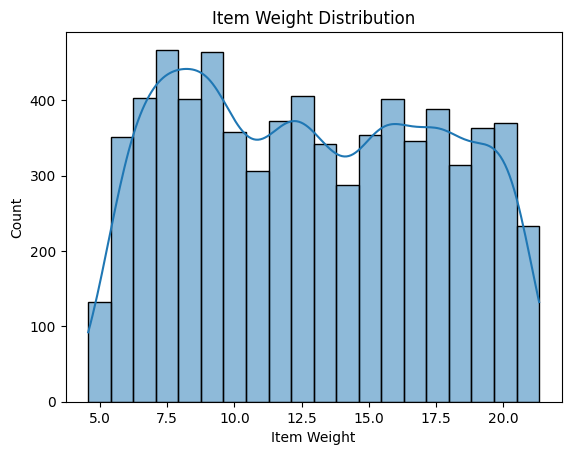

In [16]:
sns.histplot(df['Item Weight'], kde=True) 
plt.title('Item Weight Distribution')

In [17]:
df['Sales'].skew()  # >1 = right-skewed, <-1 = left-skewed, near 0 = normal
df['Sales'].kurtosis()


np.float64(-0.8897691448319565)

In [18]:
(df['Item Visibility']==0).sum() ##getting 526 output : right skewness

np.int64(526)

<Axes: xlabel='Item Visibility', ylabel='Count'>

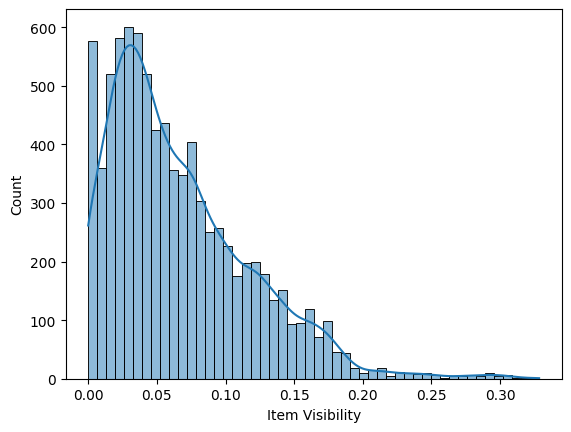

In [19]:
sns.histplot(df['Item Visibility'], kde=True)

In [20]:
(df['Sales']==0).sum()
(df['Item Weight']==0).sum()


np.int64(0)

<Axes: xlabel='Item Weight', ylabel='Count'>

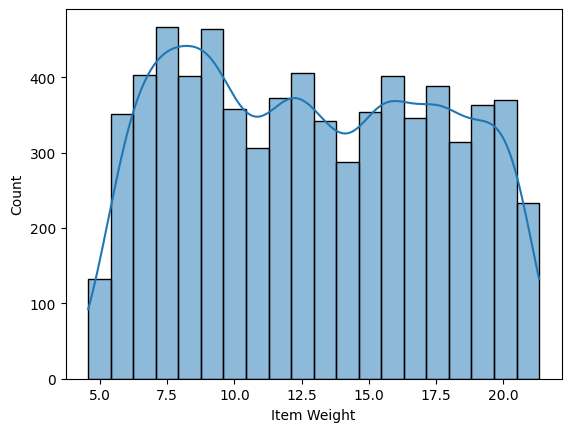

In [21]:
sns.histplot(df['Item Weight'], kde=True)

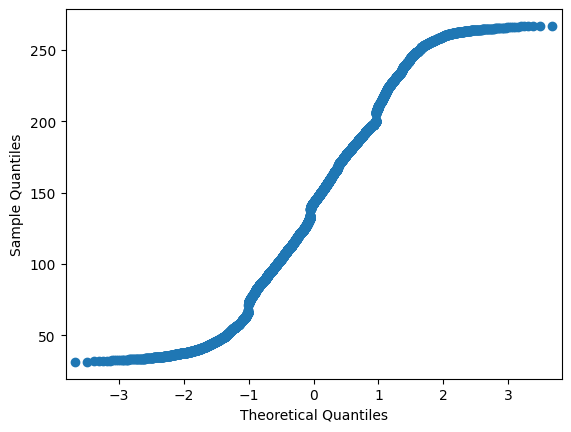

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(df['Sales'])
plt.show()

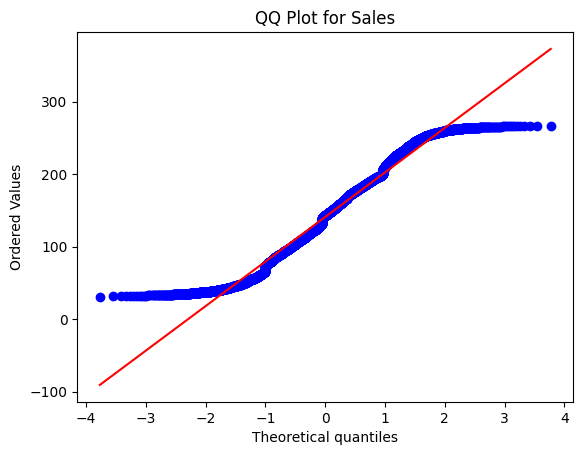

In [23]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(df['Sales'], dist="norm", plot=plt)
plt.title("QQ Plot for Sales")
plt.show()


<Axes: xlabel='Sales', ylabel='Sales'>

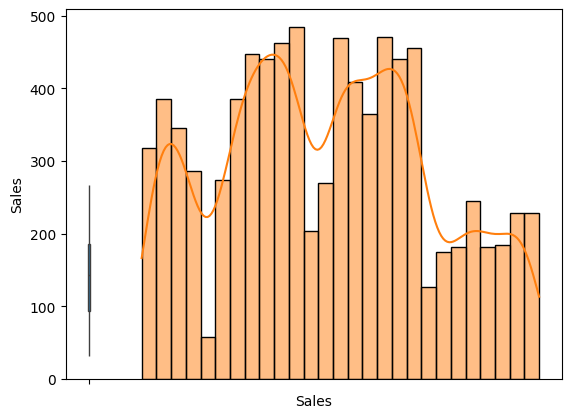

In [24]:
sns.boxplot(df['Sales'])
sns.histplot(df['Sales'], kde=True)


In [25]:
#Checking outliers and ploting graph 

<Axes: >

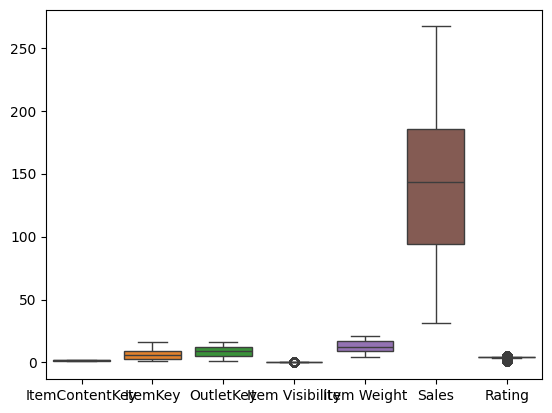

In [26]:
sns.boxplot(df)

<Axes: >

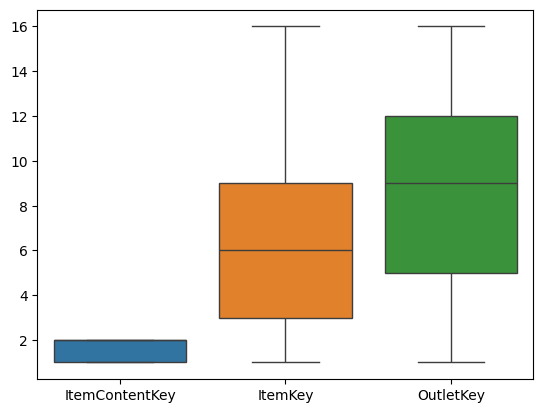

In [27]:
sns.boxplot(df.iloc[:,0:4])

count    8523.000000
mean        3.965857
std         0.605651
min         1.000000
25%         4.000000
50%         4.000000
75%         4.200000
max         5.000000
Name: Rating, dtype: float64

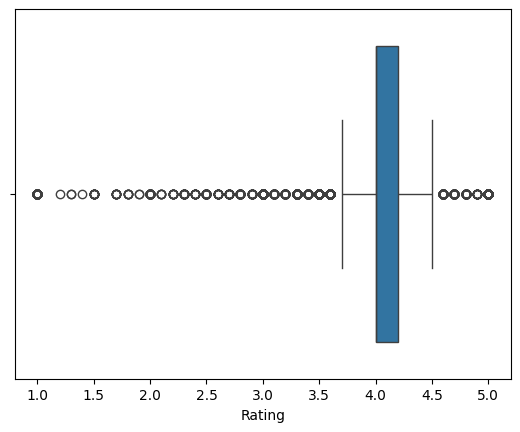

In [28]:
sns.boxplot(x=df['Rating']) 
df['Rating'].describe()

<Axes: xlabel='Sales'>

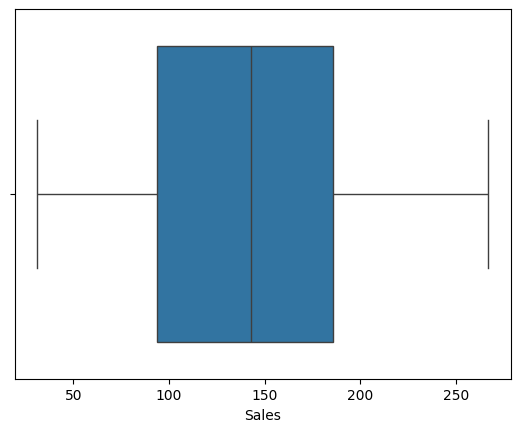

In [29]:
sns.boxplot(x=df['Sales'])

In [ ]:
'''
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
'''

ValueError: could not convert string to float: 'FDX32'

<Figure size 1000x800 with 0 Axes>

In [31]:
df['Sales'].value_counts()

Sales
172.0422    7
142.0154    6
170.5422    6
196.5084    6
109.5228    6
           ..
246.2486    1
119.0782    1
196.4794    1
254.9356    1
154.5314    1
Name: count, Length: 5938, dtype: int64

<Axes: xlabel='Rating'>

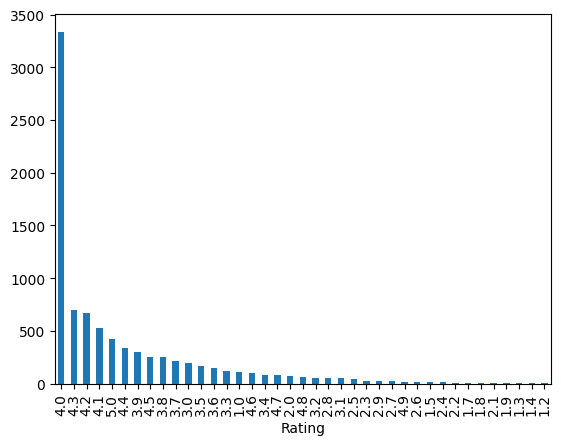

In [32]:
df['Rating'].value_counts().plot(kind='bar')

In [ ]:
df['ItemContentKey'].value_counts() 

ItemContentKey
2    5517
1    3006
Name: count, dtype: int64

<Axes: xlabel='ItemContentKey'>

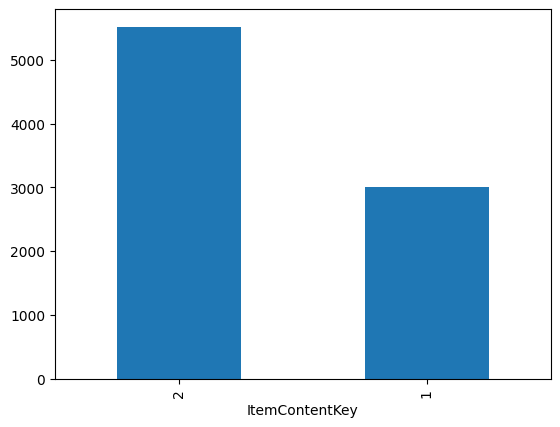

In [ ]:
df['ItemContentKey'].value_counts().plot(kind='bar')

In [ ]:
'''   
| Column          | Type               | Encoding                  |
| --------------- | ------------------ | ------------------------- |
| ItemContentKey  | Nominal (no order) | One-Hot                   |
| OutletKey       | Nominal (no order) | One-Hot                   |
| ItemKey         | Nominal (no order) | One-Hot or Drop if unique |
| Item Identifier | Unique ID          | Drop (no encoding)        |


| Column                                   | Dtype     | Meaning                                   | Encoding               | Why                                       |
| ---------------------------------------- | --------- | ----------------------------------------- | ---------------------- | ----------------------------------------- |
| **ItemContentKey**                       | `int64`   | 1 = Low Fat, 2 = Regular (binary nominal) | **Label Encode (0–1)** | Two unordered categories                  |
| **Item Identifier**                      | `object`  | Unique ID (e.g., “FDA15”)                 | ❌ **Drop**             | Unique for each row — no predictive value |
| **ItemKey**                              | `int64`   | Code for item type                        | **One-Hot Encode**     | Multiple unordered categories             |
| **OutletKey**                            | `int64`   | Code for outlet                           | **One-Hot Encode**     | Multiple unordered categories             |
| **Item Visibility, Item Weight, Rating** | `float64` | Numeric measures                          | Keep numeric           | Already numeric                           |
| **Sales**                                | `float64` | Target variable                           | Regression output      | Continuous numeric                        |

'''

'   \n| Column          | Type               | Encoding                  |\n| --------------- | ------------------ | ------------------------- |\n| ItemContentKey  | Nominal (no order) | One-Hot                   |\n| OutletKey       | Nominal (no order) | One-Hot                   |\n| ItemKey         | Nominal (no order) | One-Hot or Drop if unique |\n| Item Identifier | Unique ID          | Drop (no encoding)        |\n\n\n| Column                                   | Dtype     | Meaning                                   | Encoding               | Why                                       |\n| ---------------------------------------- | --------- | ----------------------------------------- | ---------------------- | ----------------------------------------- |\n| **ItemContentKey**                       | `int64`   | 1 = Low Fat, 2 = Regular (binary nominal) | **Label Encode (0–1)** | Two unordered categories                  |\n| **Item Identifier**                      | `object`  | 

In [33]:
#missing values visualization

In [ ]:
#Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print("\nPercentage of Missing Values:\n", missing_percent)



Percentage of Missing Values:
 Item Weight    17.165317
dtype: float64


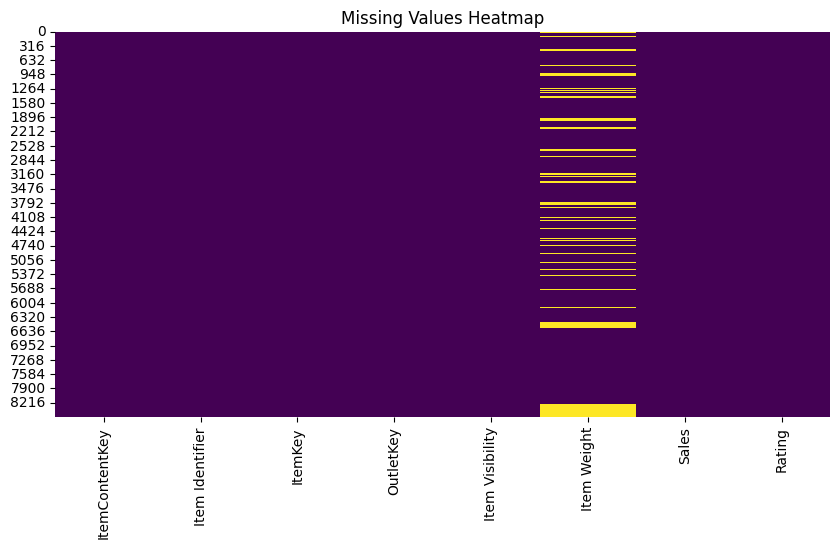

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


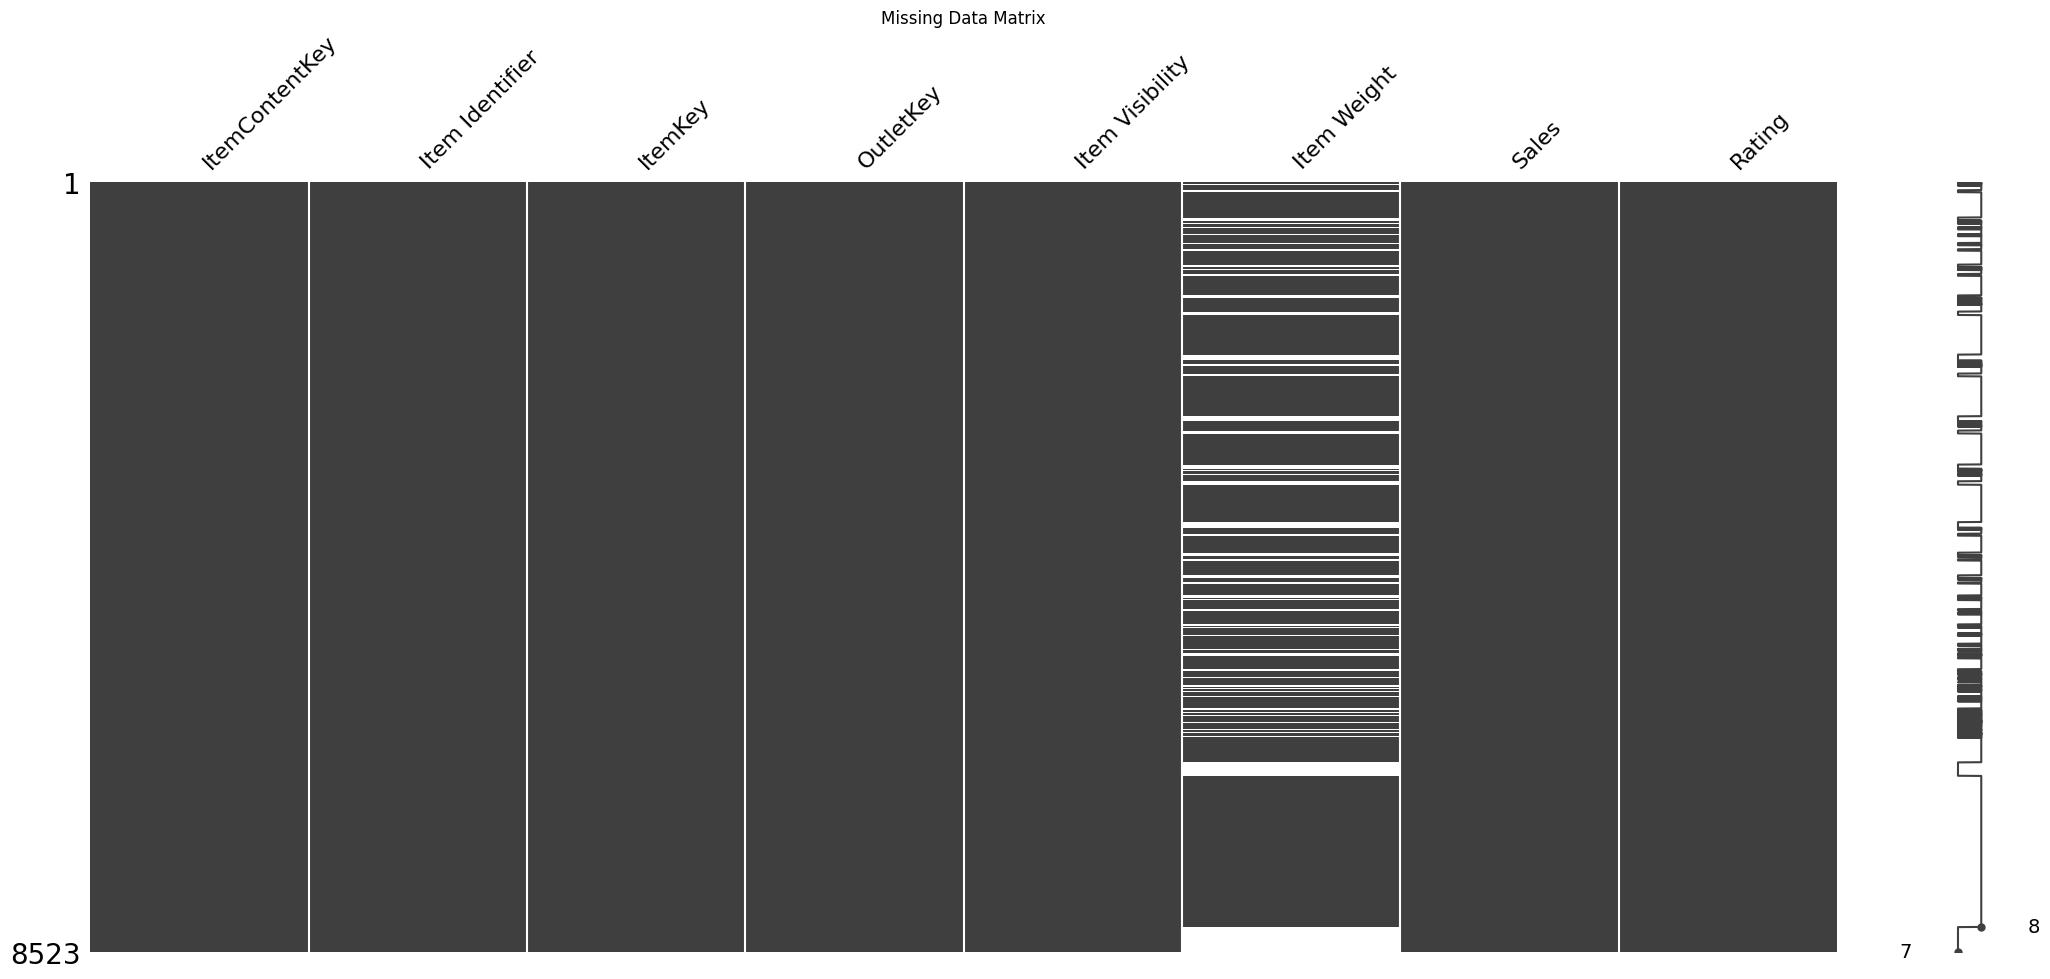

In [36]:
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()


<Axes: >

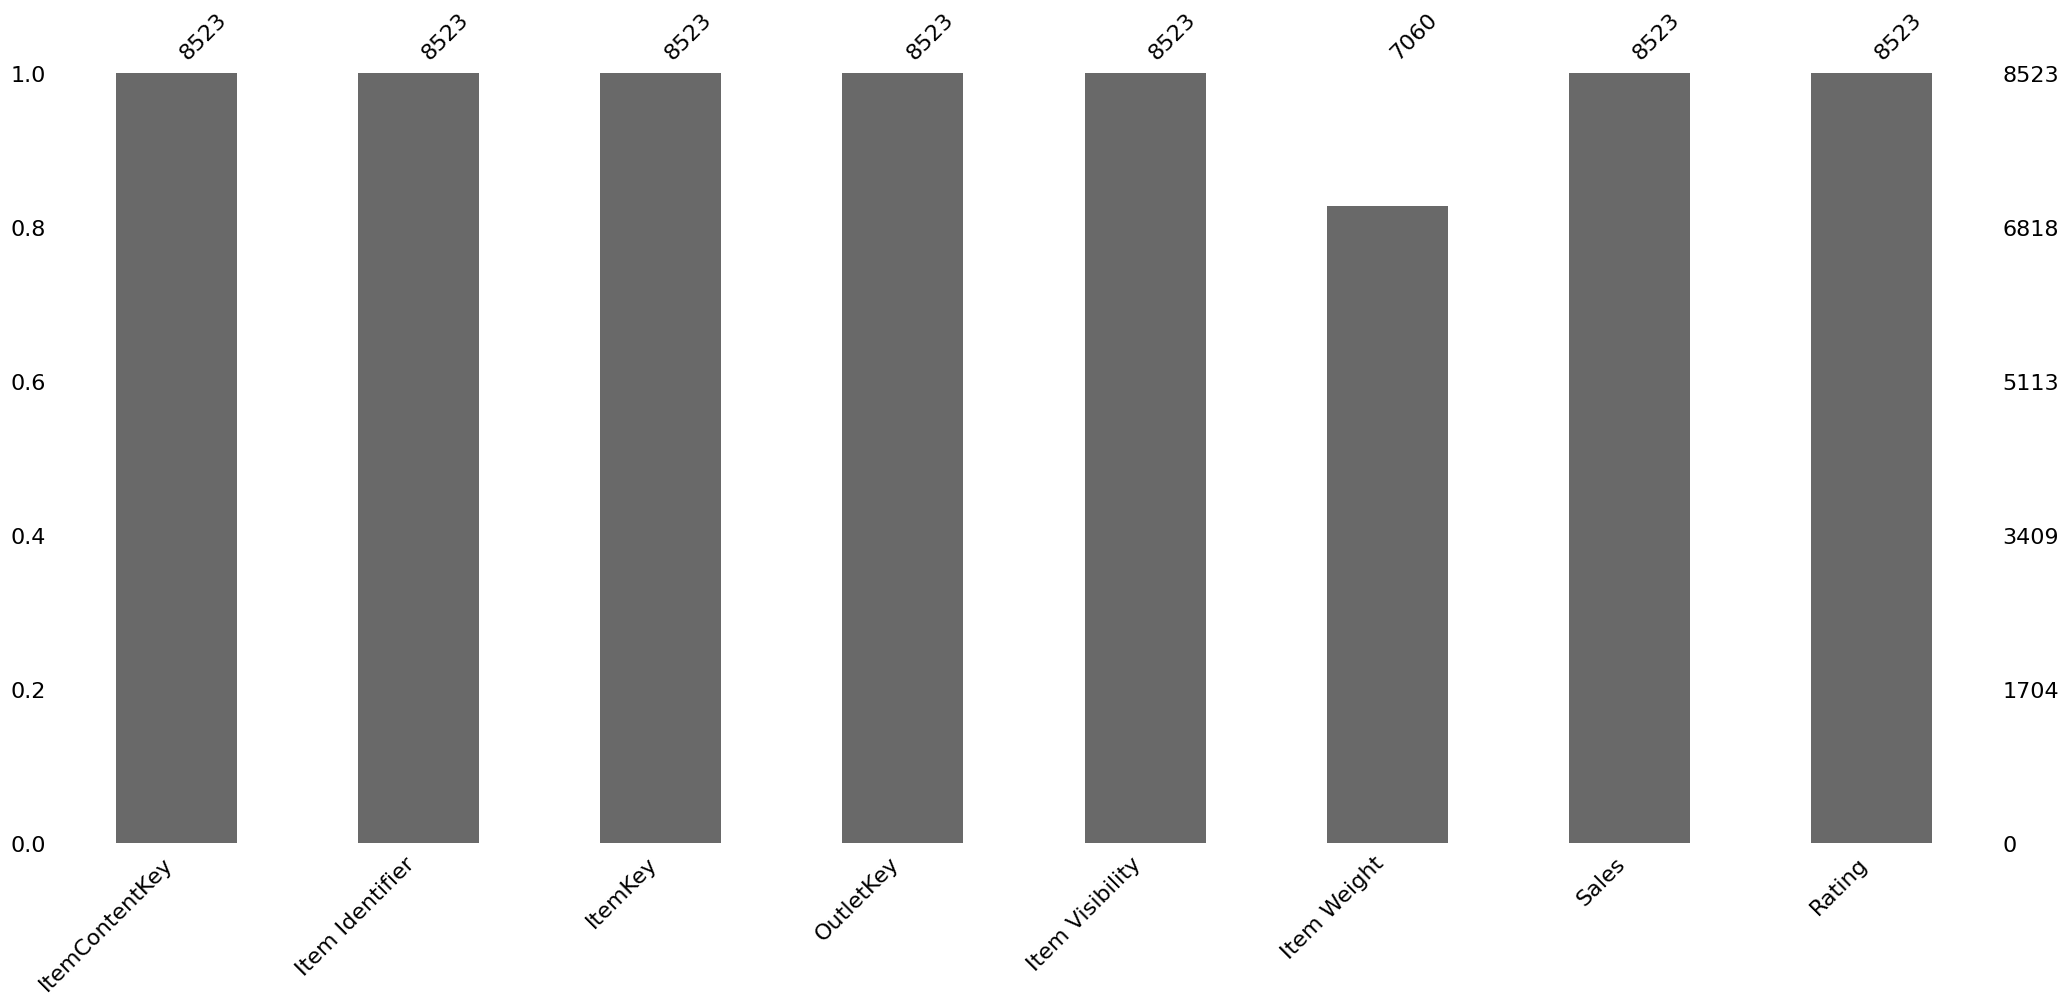

In [37]:
msno.bar(df)


<Axes: xlabel='Sales'>

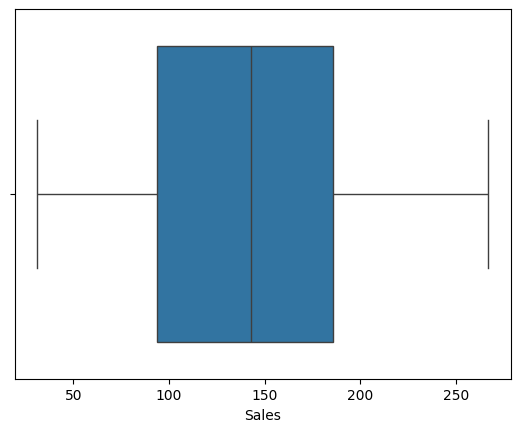

In [38]:
sns.boxplot(x=df['Sales'])

<Axes: xlabel='OutletKey', ylabel='count'>

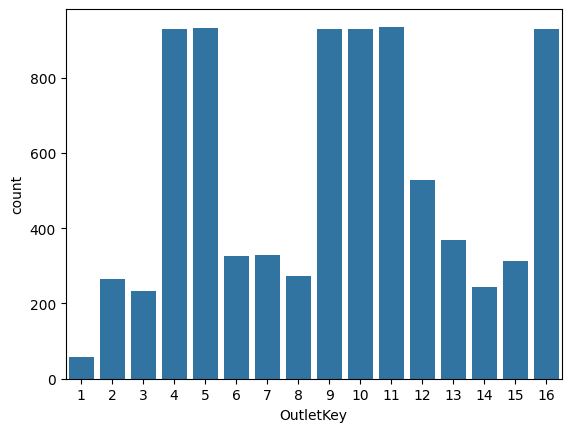

In [39]:
sns.countplot(x='OutletKey', data=df)

<Axes: xlabel='ItemKey'>

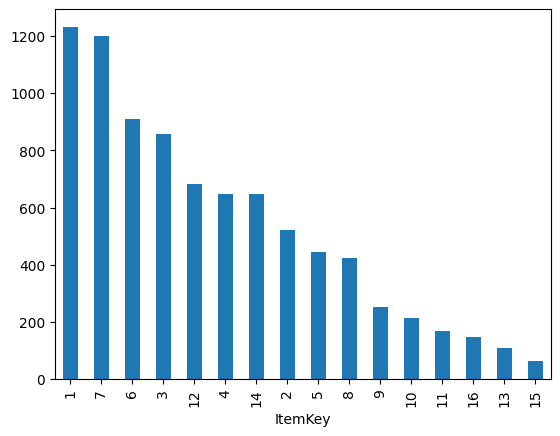

In [40]:
df['ItemKey'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='ItemContentKey'>

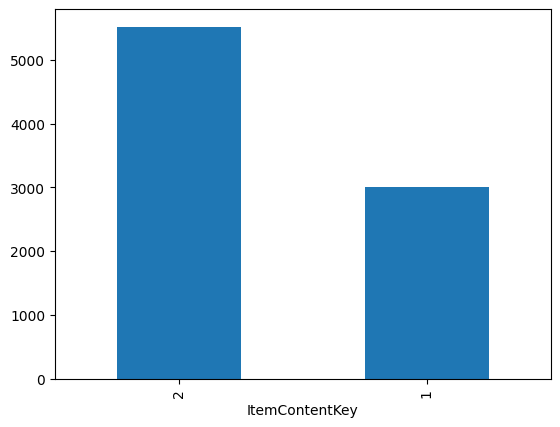

In [41]:
df['ItemContentKey'].value_counts().plot(kind='bar')
                                           

In [ ]:
#checking the columns Dtypes and numerical/categorical type

In [42]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object','category']).columns


In [43]:
for col in df.columns:
    if col in numeric_cols:
        print(f"{col}: Numeric")
    elif col in categorical_cols:
        print(f"{col}: Categorical")
    else:
        print(f"{col}: Identifier/Other")


ItemContentKey: Numeric
Item Identifier: Categorical
ItemKey: Numeric
OutletKey: Numeric
Item Visibility: Numeric
Item Weight: Numeric
Sales: Numeric
Rating: Numeric


In [ ]:
#High-card vs Low-card columns

#“Cardinality” means unique values count:

'''   
High-cardinality: nunique() > 20 (e.g. product IDs)

Low-cardinality: nunique() <= 20 (e.g. outlet types)


Use:

OrdinalEncoder for high-card

OneHotEncoder for low-card
'''

'   \nHigh-cardinality: nunique() > 20 (e.g. product IDs)\n\nLow-cardinality: nunique() <= 20 (e.g. outlet types)\n\n\nUse:\n\nOrdinalEncoder for high-card\n\nOneHotEncoder for low-card\n'

In [ ]:
for col in categorical_cols:
    print(col, df[col].nunique())


Item Identifier 1559


In [ ]:
''' MULTIVARAITE:

| Relationship Type         | Example Columns               | Technique / Plot                                                                               | Why                                                     |
| ------------------------- | ----------------------------- | ---------------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| Numeric ↔ Target          | `Item Weight` vs `Sales`      | `sns.scatterplot(x='Item Weight', y='Sales', data=df)`<br>`df[['Item Weight','Sales']].corr()` | See if heavier items sell more                          |
| Numeric ↔ Target          | `Rating` vs `Sales`           | Boxplot or scatter plot                                                                        | See how rating impacts sales                            |
| Numeric ↔ Target          | `Item Visibility` vs `Sales`  | Scatter plot + regression line                                                                 | Check effect of visibility on sales                     |
| Categorical ↔ Target      | `Outlet Key` vs `Sales`       | Boxplot or barplot (mean sales per outlet)                                                     | Identify top-performing outlets                         |
| Categorical ↔ Target      | `Item Content Key` vs `Sales` | Boxplot or aggregation                                                                         | Check which item category sells most                    |
| Categorical ↔ Target      | `Item Key` vs `Sales`         | Barplot (top categories only)                                                                  | Identify best-selling items                             |
| Numeric ↔ Numeric         | `Item Weight` vs `Rating`     | Scatterplot or correlation heatmap                                                             | Detect possible relationships                           |
| Categorical ↔ Categorical | `Item Key` vs `Outlet Key`    | Crosstab / Heatmap                                                                             | Find if certain items are more sold in specific outlets |
| Target Transformation     | `Sales`                       | Apply `np.log1p(df['Sales'])` if skewed                                                        | Helps models perform better                             |


'''

" MULTIVARAITE:\n\n| Relationship Type         | Example Columns               | Technique / Plot                                                                               | Why                                                     |\n| ------------------------- | ----------------------------- | ---------------------------------------------------------------------------------------------- | ------------------------------------------------------- |\n| Numeric ↔ Target          | `Item Weight` vs `Sales`      | `sns.scatterplot(x='Item Weight', y='Sales', data=df)`<br>`df[['Item Weight','Sales']].corr()` | See if heavier items sell more                          |\n| Numeric ↔ Target          | `Rating` vs `Sales`           | Boxplot or scatter plot                                                                        | See how rating impacts sales                            |\n| Numeric ↔ Target          | `Item Visibility` vs `Sales`  | Scatter plot + regression line                 

In [44]:
df = df.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ItemContentKey   8523 non-null   int64  
 1   Item Identifier  0 non-null      float64
 2   ItemKey          8523 non-null   int64  
 3   OutletKey        8523 non-null   int64  
 4   Item Visibility  8523 non-null   float64
 5   Item Weight      7060 non-null   float64
 6   Sales            8523 non-null   float64
 7   Rating           8523 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 532.8 KB


In [ ]:
#Plotting Different types of graphs 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# -------------------------------
# 1. Histograms with KDE for Numeric Columns
# -------------------------------
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(int(np.ceil(len(numerical_cols)/4)), 4, i+1)
    sns.histplot(df[col], kde=True, bins=20, color=sns.color_palette("Set2")[i % 8])
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


# -------------------------------
# 2. Boxplots for Numeric Columns
# -------------------------------
plt.figure(figsize=(25, 10))
sns.boxplot(data=df[numerical_cols], palette="Set3")
plt.title("Boxplots of All Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# -------------------------------
# 3. Q-Q Plots with Histogram Overlay
# -------------------------------
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx])
    axes[idx].set_title(f"{col} Q-Q Plot")
    axes[idx].hist(df[col].dropna(), bins=20, alpha=0.3, color='skyblue', density=True)

# Remove empty axes
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# -------------------------------
# 4. Pie Chart for a Categorical Column
# -------------------------------
if categorical_cols:
    plt.figure(figsize=(8,8))
    df[categorical_cols[0]].value_counts().plot.pie(
        autopct='%1.1f%%',
        colors=sns.color_palette("Set2"),
        explode=[0.05]*df[categorical_cols[0]].nunique(),
        shadow=True
    )
    plt.ylabel('')
    plt.title(f"Step 2: {categorical_cols[0]} Distribution (Pie Chart)")
    plt.show()


# -------------------------------
# 5. Countplots for Categorical Columns
# -------------------------------
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Step 2: {col} Countplot")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# -------------------------------
# 6. Correlation Heatmap for Numeric Columns
# -------------------------------
plt.figure(figsize=(25, 20))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Step 2: Correlation Heatmap")
plt.show()


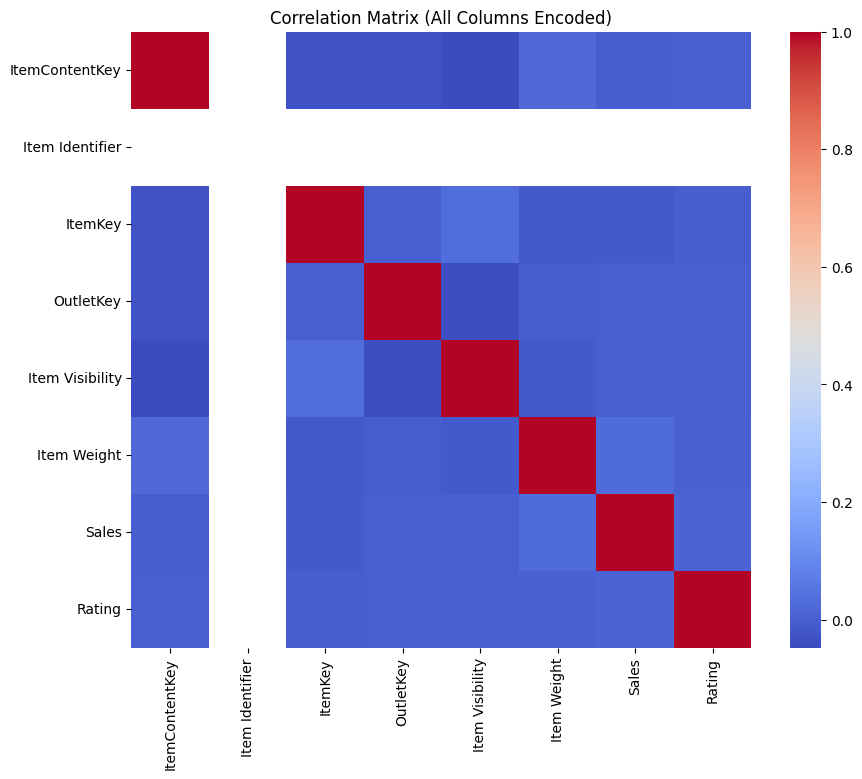

In [ ]:
'''
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

'''
'''  
You want correlation for all columns
Convert categorical columns temporarily using .cat.codes
Use df_encoded approach
'''
'''

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (All Columns Encoded)")
plt.show()
'''

In [ ]:
#Multicollinearity Check (Important before modeling)
#If correlation between independent variables > 0.85 → remove one.

<Axes: >

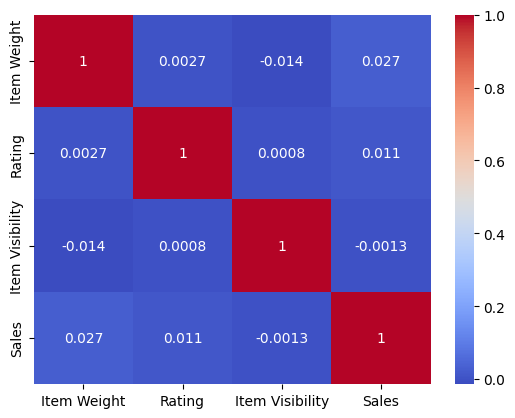

In [ ]:
sns.heatmap(df[['Item Weight', 'Rating', 'Item Visibility', 'Sales']].corr(), annot=True, cmap='coolwarm')


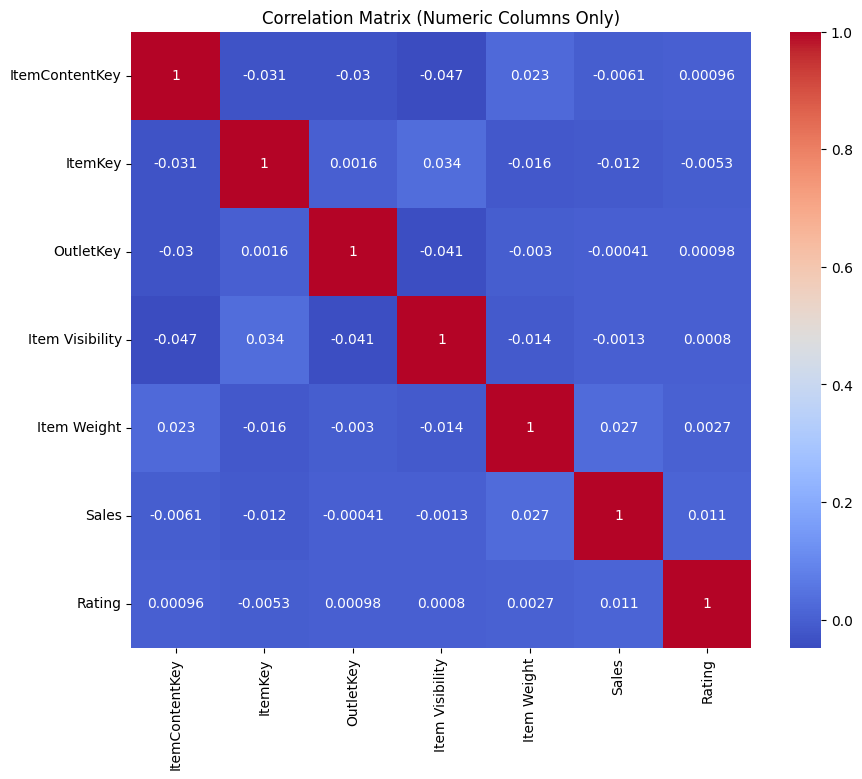

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])  #whenever get ValueError: could not convert string to float: 'FDX32': Solution ==select_dtypes() filters out columns like 'Item Identifier' which are strings, so .corr() doesn’t fail.===This happens because you are trying to compute correlation (df.corr()) —
#but correlation is only defined for numeric columns.'FDX32' is a string (from Item Identifier column),so Python can’t convert it to float.

# Now plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()


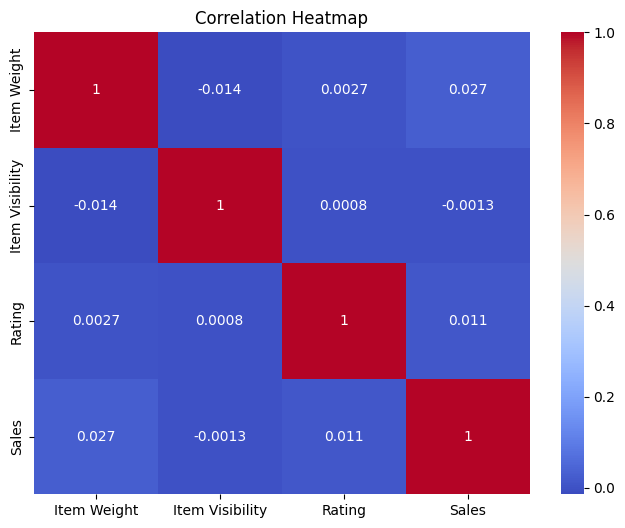

'   \nInterpretation:\n\n>0.85 (positive) → too correlated → remove one variable.\n\nNegative correlation → opposite trend.\n\nNear 0 → no linear relationship.\n'

In [ ]:
plt.figure(figsize=(8,6))
corr = df[['Item Weight','Item Visibility','Rating','Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


'''   
Interpretation:

>0.85 (positive) → too correlated → remove one variable.

Negative correlation → opposite trend.

Near 0 → no linear relationship.
'''

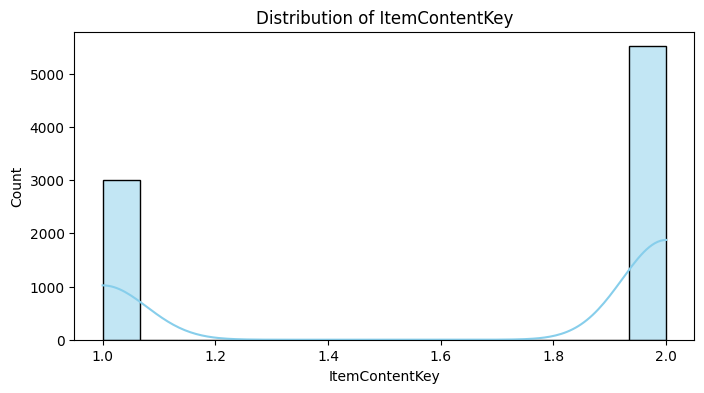

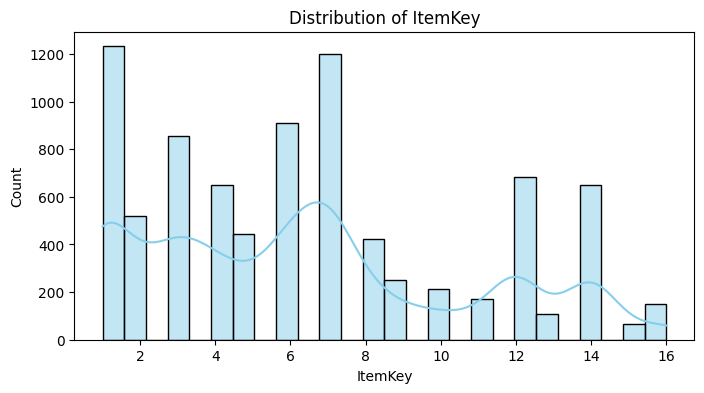

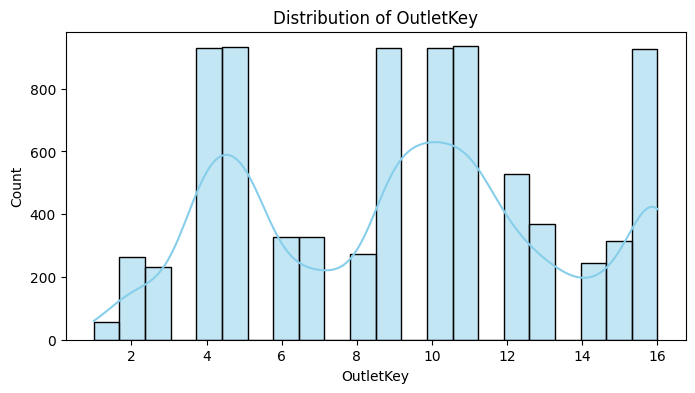

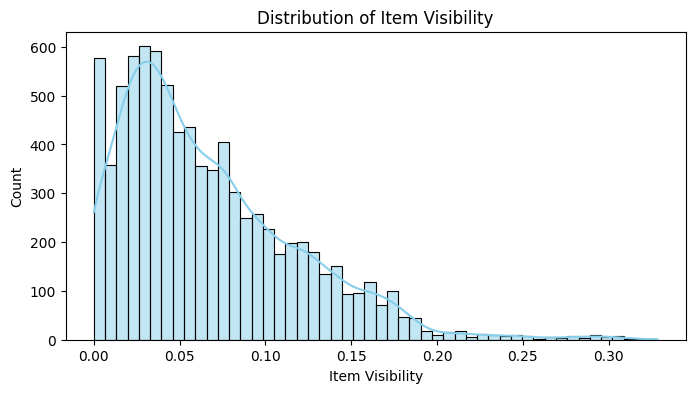

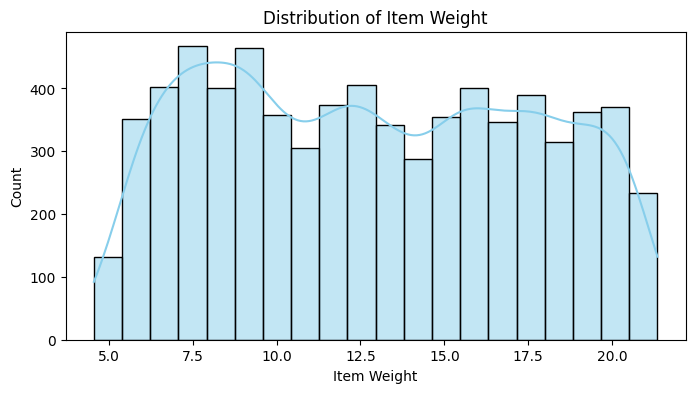

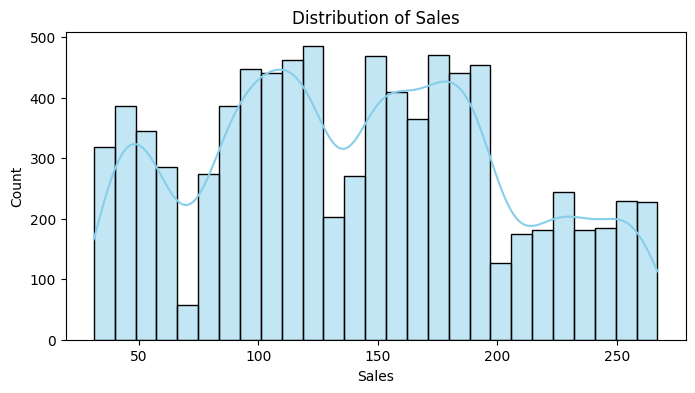

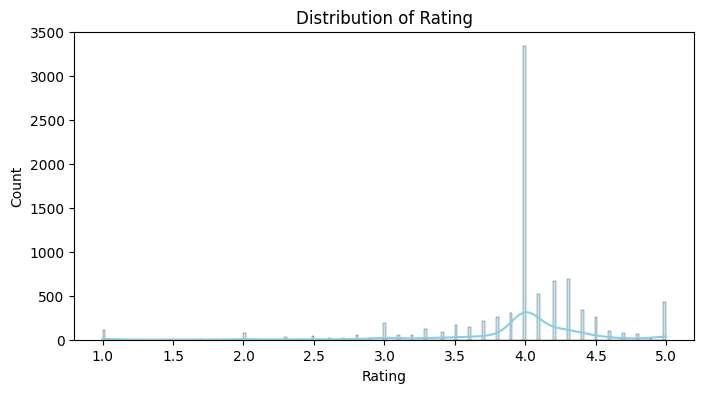

C:\Users\pushk\AppData\Local\Temp\ipykernel_22784\2445573904.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_univariate(df):
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    cat_cols = df.select_dtypes(include=['object','category']).columns

    for col in num_cols:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.show()

    for col in cat_cols:
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.show()

print(plot_univariate(df))


In [ ]:
'''   
| Concept             | What It Does                 | Why Important                                 |
| ------------------- | ---------------------------- | --------------------------------------------- |
| QQ Plot             | Checks normality             | Detect skewness before scaling/transformation |
| Zero checks         | Find impossible values       | Data quality check                            |
| Cardinality         | Identify encoding strategy   | Avoid overfitting or sparse data              |
| Correlation heatmap | Detect multicollinearity     | Reduce redundancy                             |
| Custom Transformer  | Automate feature engineering | Keeps preprocessing consistent in pipeline    |

'''

In [ ]:
#df["ItemContentKey"] = df["ItemContentKey"].map({1: 0, 2: 1})

In [ ]:
#Anomaly Detection : IQR Method

In [ ]:
import numpy as np
from scipy import stats

Q1 = np.percentile(df['Rating'], 25, axis=0)
Q3 = np.percentile(df['Rating'], 75, axis=0)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR  #1.5 
upper_bound = Q3 + 3 * IQR

anomalies = np.where((df['Rating'] < lower_bound) | (df['Rating'] > upper_bound))
unique_anomalies = np.unique(anomalies[0])
print("Anomalies detected at indices (IQR):", unique_anomalies)

Anomalies detected at indices (IQR): [   0    1    2 ... 5836 5837 5838]


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self   # nothing to learn, just return self

    def transform(self, X):
        X = X.copy()

        # Feature 1: Ratio - normalizes visibility by weight
        X['Visibility_Ratio'] = X['Item Visibility'] / (X['Item Weight'] + 1e-6)

        # Feature 2: Binary - heavy or light item
        X['Is_Heavy_Item'] = (X['Item Weight'] > X['Item Weight'].median()).astype(int)

        # Feature 3: Log transformation to reduce skewness
        X['Log_Item_Visibility'] = np.log1p(X['Item Visibility'])

        return X


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import ensemble, preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

X = df.drop(['Sales'], axis=1)  
y = df['Sales']

# 1️ Numeric pipeline     --For Numeric type columns
num_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('imputer', KNNImputer(n_neighbors=3,weights='uniform',metric='nan_euclidean' )), #weight :or 'distance' , metric: 'manhattan' or 'minkowski' also possible
    ('imputer', IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=42)),
    ('scaler', StandardScaler()),
])
'''
# 2️ Categorical pipeline (ordinal)  ---For categorical types columns but only for independenet fetrures
cat_pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
'''


cat_pipe_high = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

cat_pipe_low = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


'''
# 3️ Categorical pipeline (one-hot)  ---For categorical types columns
cat_pipe_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))  #drop='first'
    #('encoder' , OneHotEncoder(drop='if_binary', handle_unknown='ignore')) #for binary encoding
])
'''
# 4️ Combine all
transformer = ColumnTransformer(transformers=[
    ('num', num_pipe, ['Item Weight','Rating','Item Visibility']),
    #('cat_ord', cat_pipe_ordinal, ['Genre']),
    #('cat_ohe', cat_pipe_ohe, ["OutletKey", "ItemKey", "ItemContentKey"]),
    #('cat_pipe_label',cat_pipe_label, ['has_covid']),
    ('high_card_cols', cat_pipe_high, ['ItemContentKey', 'ItemKey']),
    ('low_card_cols', cat_pipe_low, ['OutletKey'])
], remainder='drop')  #passthrough

# 5️ Final pipeline
pipeline = Pipeline([
    ('transformer', transformer),
    #('scaler', preprocessing.RobustScaler()), # scaling robust to outliers, #RobustScaler(), minmaxscalar(), PowerTransformer(), QuantileTransformer()
	('select', SelectKBest(score_func=f_classif, k=10)),   #chi2:chisquare is only apply on non negative data, f_classif, mutual_info_classif
    #('imputer', KNNImputer(missing_values=int, n_neighbors=5, weights=['uniform', 'distance'], metric=['nan_euclidean', 'manhattan', 'minkowski'])),
    #('select', PCA(whiten=True))

    #('classifier', LogisticRegression(max_iter=500)),
    #('classifier', LogisticRegression()) #0.85
    #('classifier', GaussianNB()) #0.83
    #('classifier', RandomForestClassifier())
    #('classifier', ensemble.GradientBoostingClassifier())
    #('regressor', LinearRegression())   #47.6
    #('regressor', ensemble.RandomForestRegressor()) #76.2
    ('regressor', SVR())   
    #('random_forest', RandomForestRegressor())
    #('classifier', KNeighborsClassifier(n_neighbors=1)), #55
    #('regressor', linear_model.RANSACRegressor()),
    #('regressor', LinearRegression())
    
])


scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1, scoring='r2')  # f1_macro for imbalanced classes, take different values for cv,n_jobs,abd pipleline with differnet models
print("Classification accuracy values using 10-fold CV:", scores)   # any negative or extreme values?
print("Mean classification accuracy: %.4f" % scores.mean())


Classification accuracy values using 10-fold CV: [ 0.00637968 -0.00298884  0.00593377  0.00234233  0.00386918 -0.00588129
 -0.00628344  0.00527018 -0.00226361  0.00081119]
Mean classification accuracy: 0.0007


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn import ensemble, preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import FunctionTransformer

X = df.drop(['Sales'], axis=1)  
y = df['Sales']



#drop unnecessary columns
drop_cols = ['Item Identifier']
drop_columns_transformer = FunctionTransformer(lambda X: X.drop(columns=drop_cols, errors='ignore'))



# 1️⃣ Numeric pipeline     --For Numeric type columns
num_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('imputer', KNNImputer(n_neighbors=3,weights='uniform',metric='nan_euclidean' )), #weight :or 'distance' , metric: 'manhattan' or 'minkowski' also possible
    ('imputer', IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=42)),
    ('scaler', StandardScaler()),
])
'''
# 2️⃣ Categorical pipeline (ordinal)  ---For categorical types columns but only for independenet fetrures
cat_pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
'''


cat_pipe_high = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

cat_pipe_low = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


'''
# 3️⃣ Categorical pipeline (one-hot)  ---For categorical types columns
cat_pipe_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))  #drop='first'
    #('encoder' , OneHotEncoder(drop='if_binary', handle_unknown='ignore')) #for binary encoding
])
'''
# 4️⃣ Combine all
transformer = ColumnTransformer(transformers=[
    ('num', num_pipe, ['Item Weight','Rating','Item Visibility']),
    #('cat_ord', cat_pipe_ordinal, ['Genre']),
    #('cat_ohe', cat_pipe_ohe, ["OutletKey", "ItemKey", "ItemContentKey"]),
    #('cat_pipe_label',cat_pipe_label, ['has_covid']),
    ('high_card_cols', cat_pipe_high, ['ItemContentKey', 'ItemKey']),
    ('low_card_cols', cat_pipe_low, ['OutletKey'])
], remainder='drop')  #passthrough

# 5️⃣ Final pipeline
pipeline = Pipeline([
    ('drop_cols', drop_columns_transformer),   # drop redundant columns
    ('transformer', transformer),
    #('scaler', preprocessing.RobustScaler()), # scaling robust to outliers, #RobustScaler(), minmaxscalar(), PowerTransformer(), QuantileTransformer()
	('select', SelectKBest(score_func=mutual_info_regression, k=10)), #f_regression ,mutual_info_regression : for regressions  #chi2:chisquare is only apply on non negative data, f_classif, mutual_info_classif
    #('imputer', KNNImputer(missing_values=int, n_neighbors=5, weights=['uniform', 'distance'], metric=['nan_euclidean', 'manhattan', 'minkowski'])),
    #('select', PCA(whiten=True))

    #('classifier', LogisticRegression(max_iter=500)),
    #('classifier', LogisticRegression()) #0.85
    #('classifier', GaussianNB()) #0.83
    #('classifier', RandomForestClassifier())
    #('classifier', ensemble.GradientBoostingClassifier())
    #('regressor', LinearRegression())   #47.6
    #('regressor', ensemble.RandomForestRegressor()) #76.2
    #('regressor', SVR())   
    ('random_forest', RandomForestRegressor())
    #('regressor', ensemble.GradientBoostingRegressor())
    #('regressor', KNeighborsRegressor())
    #('classifier', KNeighborsClassifier(n_neighbors=1)), #55
    #('regressor', linear_model.RANSACRegressor()),
    #('regressor', LinearRegression())
    
])


scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1, scoring='r2')  # f1_macro for imbalanced classes, take different values for cv,n_jobs,abd pipleline with differnet models
print("Classification accuracy values using 10-fold CV:", scores)   # any negative or extreme values?
print("Mean classification accuracy: %.4f" % scores.mean())

mae_scores = cross_val_score(pipeline, X, y, cv=10, scoring=make_scorer(mean_absolute_error))
print("Mean MAE values (10-fold CV): %.4f" % mae_scores.mean())

rmse_scores = cross_val_score(pipeline, X, y, cv=10, scoring=make_scorer(root_mean_squared_error))
print("Mean RMSE values (10-fold CV): %.4f" % rmse_scores.mean())


Classification accuracy values using 10-fold CV: [0.70205341 0.6125238  0.64593923 0.60458932 0.64083044 0.63267046
 0.56673776 0.62207263 0.76088126 0.50224373]
Mean classification accuracy: 0.6291
Mean MAE values (10-fold CV): 23.8985
Mean RMSE values (10-fold CV): 37.5820


In [ ]:
''' ON ABOVE OUTPUT::===

1. R² = 0.6291 (62.91%)
What it means:

Your model explains 62.91% of the variance in Sales

This means the model captures about 63% of the patterns in the data

The remaining ~37% is unexplained variance (could be noise, unmeasured factors, or inherent randomness)

Benchmark comparison:

R² < 0.3 → Poor model

R² 0.3–0.5 → Moderate/Fair model

R² 0.5–0.7 → Good model ✓ (Your result: 0.6291)

R² 0.7–0.9 → Very good model

R² > 0.9 → Excellent (or possibly overfitting)

Your R² of 0.63 is in the "good" range, especially for retail sales prediction where many external factors (promotions, seasonality, customer behavior, competition) aren't captured in your dataset.

Improvement from your original pipeline:

Original: R² = -0.003 (completely failed)

Current: R² = 0.6291

Improvement: +0.632 (21,000% better!)

========================================================================================================

2. MAE = 23.90
What it means:

On average, your predictions are $23.90 off from the actual sales values

Half of your predictions are closer than $23.90, half are further away

Context from your data:

Mean Sales: $140.99

Median Sales: $143.01

Standard deviation: $62.28

Sales range: $31.29 to $266.89

Percentage error:

MAE / Mean Sales = 23.90 / 140.99 = 16.95%

This means your predictions are typically off by about 17%

Benchmark:

< 10% error → Excellent

10–20% error → Good ✓ (Your result: 17%)

20–30% error → Fair

30% error → Poor

Your MAE of $23.90 (17% error) is good for retail sales forecasting.

===========================================================================================

3. RMSE = 37.58
What it means:

Root Mean Squared Error penalizes large errors more heavily than MAE

RMSE of $37.58 means your model's typical prediction error is about $38

Why RMSE > MAE:

RMSE (37.58) > MAE (23.90) is normal

The ratio RMSE/MAE = 37.58/23.90 = 1.57

A ratio of 1.4–1.6 is typical and suggests your errors are fairly normally distributed

If the ratio were much higher (>2), it would indicate you have some very large outliers

Percentage error:

RMSE / Mean Sales = 37.58 / 140.99 = 26.66%

Your model is typically within ±26-27% of actual sales

Context:

Standard deviation of Sales: $62.28

Your RMSE: $37.58

Ratio: 37.58 / 62.28 = 0.60

This means your model reduces uncertainty by about 40% compared to just guessing the mean

'''

Text(0, 0.5, 'Test Score')

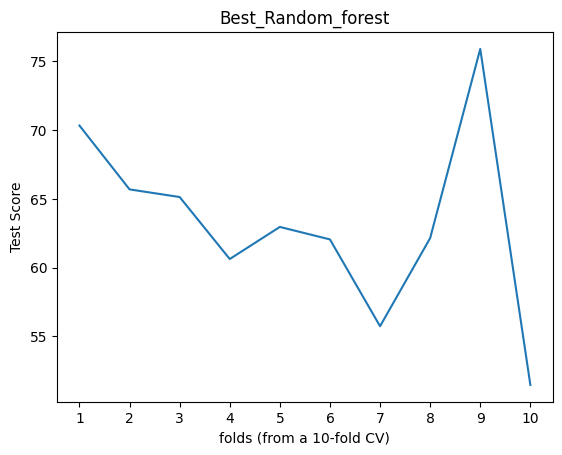

In [ ]:
# plot the results from the 10-fold CV
plt.plot(100*scores)
plt.xticks(arange(len(scores)), arange(1, len(scores)+1))
plt.title('Best_Random_forest')
plt.xlabel('folds (from a 10-fold CV)')
plt.ylabel('Test Score')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn import ensemble, preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import FunctionTransformer

X = df.drop(['Sales'], axis=1)  
y = df['Sales']



#drop unnecessary columns
drop_cols = ['Item Identifier']
drop_columns_transformer = FunctionTransformer(lambda X: X.drop(columns=drop_cols, errors='ignore'))



# 1️⃣ Numeric pipeline     --For Numeric type columns
num_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('imputer', KNNImputer(n_neighbors=3,weights='uniform',metric='nan_euclidean' )), #weight :or 'distance' , metric: 'manhattan' or 'minkowski' also possible
    ('imputer', IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=42)),
    ('scaler', StandardScaler()),
])
'''
# 2️⃣ Categorical pipeline (ordinal)  ---For categorical types columns but only for independenet fetrures
cat_pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
'''


cat_pipe_high = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

cat_pipe_low = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


'''
# 3️⃣ Categorical pipeline (one-hot)  ---For categorical types columns
cat_pipe_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))  #drop='first'
    #('encoder' , OneHotEncoder(drop='if_binary', handle_unknown='ignore')) #for binary encoding
])
'''
# 4️⃣ Combine all
transformer = ColumnTransformer(transformers=[
    ('num', num_pipe, ['Item Weight','Rating','Item Visibility']),
    #('cat_ord', cat_pipe_ordinal, ['Genre']),
    #('cat_ohe', cat_pipe_ohe, ["OutletKey", "ItemKey", "ItemContentKey"]),
    #('cat_pipe_label',cat_pipe_label, ['has_covid']),
    ('high_card_cols', cat_pipe_high, ['ItemContentKey', 'ItemKey']),
    ('low_card_cols', cat_pipe_low, ['OutletKey'])
], remainder='drop')  #passthrough

# 5️⃣ Final pipeline
pipeline = Pipeline([
    ('drop_cols', drop_columns_transformer),   # drop redundant columns
    ('transformer', transformer),
    #('scaler', preprocessing.RobustScaler()), # scaling robust to outliers, #RobustScaler(), minmaxscalar(), PowerTransformer(), QuantileTransformer()
	('select', SelectKBest(score_func=f_classif, k=10)), #f_regression: for regressions  #chi2:chisquare is only apply on non negative data, f_classif, mutual_info_classif
    #('imputer', KNNImputer(missing_values=int, n_neighbors=5, weights=['uniform', 'distance'], metric=['nan_euclidean', 'manhattan', 'minkowski'])),
    #('select', PCA(whiten=True))

    #('classifier', LogisticRegression(max_iter=500)),
    #('classifier', LogisticRegression()) #0.85
    #('classifier', GaussianNB()) #0.83
    #('classifier', RandomForestClassifier())
    #('classifier', ensemble.GradientBoostingClassifier())
    #('regressor', LinearRegression())   #47.6
    #('regressor', ensemble.RandomForestRegressor()) #76.2
    #('regressor', SVR())   
    ('random_forest', RandomForestRegressor())
    #('regressor', ensemble.GradientBoostingRegressor())
    #('regressor', KNeighborsRegressor())
    #('classifier', KNeighborsClassifier(n_neighbors=1)), #55
    #('regressor', linear_model.RANSACRegressor()),
    #('regressor', LinearRegression())
    
])

'''
scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1, scoring='r2')  # f1_macro for imbalanced classes, take different values for cv,n_jobs,abd pipleline with differnet models
print("Classification accuracy values using 10-fold CV:", scores)   # any negative or extreme values?
print("Mean classification accuracy: %.4f" % scores.mean())
'''

param_grid = {'random_forest__n_estimators':[100,200], 
              'random_forest__max_depth':[10,20]}
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X, y)
print("Best R2:", grid.best_score_)




Best R2: 0.6098729117316279


Text(0, 0.5, 'Test Score')

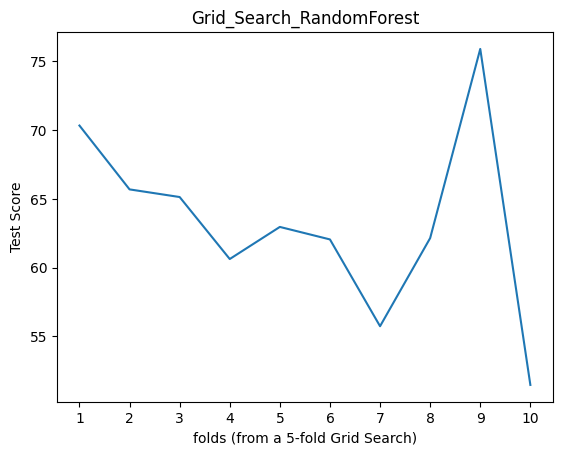

In [ ]:
# plot the results from the 10-fold CV
plt.plot(100*scores)
plt.xticks(arange(len(scores)), arange(1, len(scores)+1))
plt.title('Grid_Search_RandomForest')
plt.xlabel('folds (from a 5-fold Grid Search)')
plt.ylabel('Test Score')

Text(0, 0.5, 'Mean Test Score (10-fold CV)')

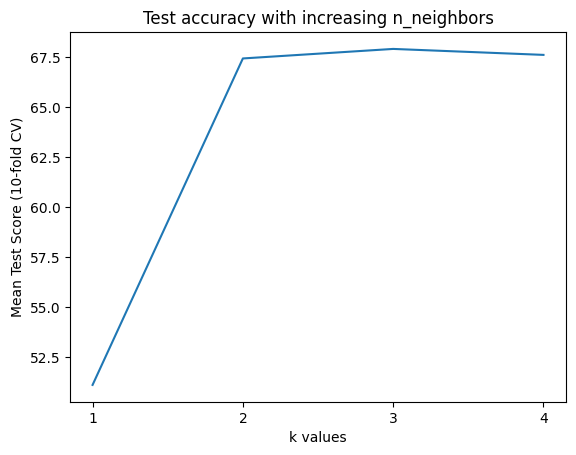

In [ ]:
# plot parameter search results
plt.plot(100*grid.cv_results_['mean_test_score'])
plt.xticks(arange(len(grid.cv_results_['mean_test_score'])), arange(1, len(grid.cv_results_['mean_test_score'])+1))
plt.title('Test accuracy with increasing n_neighbors')
plt.xlabel('k values')
plt.ylabel('Mean Test Score (10-fold CV)')

In [ ]:
#creating grid range for gridsearch method
param_grid={
    'select__k': [3, 4, 5, 6]
}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn import ensemble, preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import FunctionTransformer

X = df.drop(['Sales'], axis=1)  
y = df['Sales']



#drop unnecessary columns
drop_cols = ['Item Identifier']
drop_columns_transformer = FunctionTransformer(lambda X: X.drop(columns=drop_cols, errors='ignore'))



# 1️⃣ Numeric pipeline     --For Numeric type columns
num_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('imputer', KNNImputer(n_neighbors=3,weights='uniform',metric='nan_euclidean' )), #weight :or 'distance' , metric: 'manhattan' or 'minkowski' also possible
    ('imputer', IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=42)),
    ('scaler', StandardScaler()),
])
'''
# 2️⃣ Categorical pipeline (ordinal)  ---For categorical types columns but only for independenet fetrures
cat_pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
'''


cat_pipe_high = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

cat_pipe_low = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


'''
# 3️⃣ Categorical pipeline (one-hot)  ---For categorical types columns
cat_pipe_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))  #drop='first'
    #('encoder' , OneHotEncoder(drop='if_binary', handle_unknown='ignore')) #for binary encoding
])
'''
# 4️⃣ Combine all
transformer = ColumnTransformer(transformers=[
    ('num', num_pipe, ['Item Weight','Rating','Item Visibility']),
    #('cat_ord', cat_pipe_ordinal, ['Genre']),
    #('cat_ohe', cat_pipe_ohe, ["OutletKey", "ItemKey", "ItemContentKey"]),
    #('cat_pipe_label',cat_pipe_label, ['has_covid']),
    ('high_card_cols', cat_pipe_high, ['ItemContentKey', 'ItemKey']),
    ('low_card_cols', cat_pipe_low, ['OutletKey'])
], remainder='drop')  #passthrough

# 5️⃣ Final pipeline
pipeline = Pipeline([
    ('drop_cols', drop_columns_transformer),   # drop redundant columns
    ('transformer', transformer),
    #('scaler', preprocessing.RobustScaler()), # scaling robust to outliers, #RobustScaler(), minmaxscalar(), PowerTransformer(), QuantileTransformer()
	('select', SelectKBest(score_func=f_classif, k=10)), #f_regression: for regressions  #chi2:chisquare is only apply on non negative data, f_classif, mutual_info_classif
    #('imputer', KNNImputer(missing_values=int, n_neighbors=5, weights=['uniform', 'distance'], metric=['nan_euclidean', 'manhattan', 'minkowski'])),
    #('select', PCA(whiten=True))

    #('classifier', LogisticRegression(max_iter=500)),
    #('classifier', LogisticRegression()) #0.85
    #('classifier', GaussianNB()) #0.83
    #('classifier', RandomForestClassifier())
    #('classifier', ensemble.GradientBoostingClassifier())
    #('regressor', LinearRegression())   #47.6
    #('regressor', ensemble.RandomForestRegressor()) #76.2
    #('regressor', SVR())   
    ('random_forest', RandomForestRegressor())
    #('regressor', ensemble.GradientBoostingRegressor())
    #('regressor', KNeighborsRegressor())
    #('classifier', KNeighborsClassifier(n_neighbors=1)), #55
    #('regressor', linear_model.RANSACRegressor()),
    #('regressor', LinearRegression())
    
])

'''
scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1, scoring='r2')  # f1_macro for imbalanced classes, take different values for cv,n_jobs,abd pipleline with differnet models
print("Classification accuracy values using 10-fold CV:", scores)   # any negative or extreme values?
print("Mean classification accuracy: %.4f" % scores.mean())
'''


grid = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42),n_jobs=-1,verbose=1,scoring='r2') # use KFold in regression (StratifiedKFold is for classification) # ✅ R² for regression (not f1_macro)
grid.fit(X, y)

print('best number components', grid.best_params_)
print('best score found:', '%.1f' % (100 * grid.best_score_))




Fitting 10 folds for each of 4 candidates, totalling 40 fits
best number components {'select__k': 5}
best score found: 67.9


In [ ]:
import pandas as pd
results_df = pd.DataFrame(grid.cv_results_)
print("\nAll results:")
print(results_df[['param_select__k', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False))


All results:
   param_select__k  mean_test_score  std_test_score
2                5         0.679197        0.029673
3                6         0.676210        0.027804
1                4         0.674427        0.038066
0                3         0.510988        0.181075


Text(0, 0.5, 'Test Score')

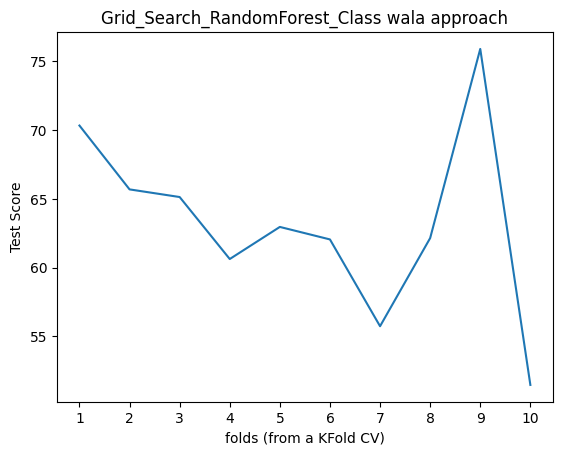

In [ ]:
# plot the results from the 10-fold CV
plt.plot(100*scores)
plt.xticks(arange(len(scores)), arange(1, len(scores)+1))
plt.title('Grid_Search_RandomForest_Class wala approach')
plt.xlabel('folds (from a KFold CV)')
plt.ylabel('Test Score')

Text(0, 0.5, 'Mean Test Score (10-fold CV)')

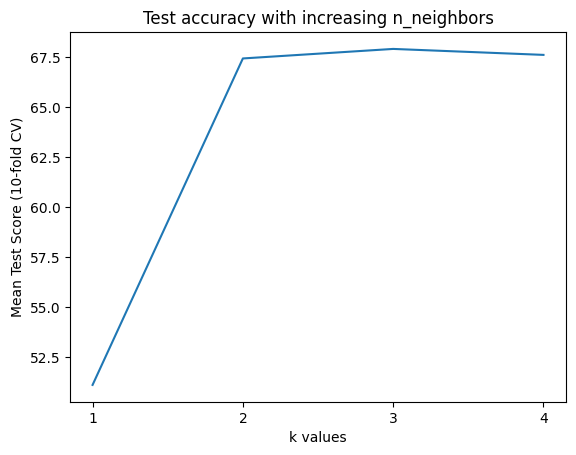

In [ ]:
# plot parameter search results
plt.plot(100*grid.cv_results_['mean_test_score'])
plt.xticks(arange(len(grid.cv_results_['mean_test_score'])), arange(1, len(grid.cv_results_['mean_test_score'])+1))
plt.title('Test accuracy with increasing n_neighbors')
plt.xlabel('k values')
plt.ylabel('Mean Test Score (10-fold CV)')

Text(0, 0.5, 'Mean Test Score (10-fold CV)')

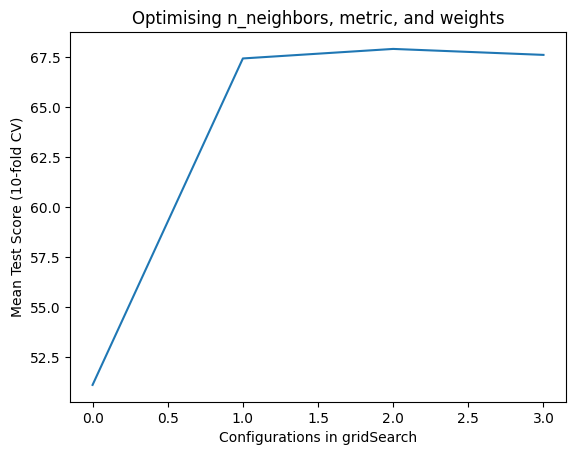

In [ ]:
# plot results
plt.plot(100*grid.cv_results_['mean_test_score'])
plt.title('Optimising n_neighbors, metric, and weights')
plt.xlabel('Configurations in gridSearch')
plt.ylabel('Mean Test Score (10-fold CV)')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn import ensemble, preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import FunctionTransformer

X = df.drop(['Sales'], axis=1)  
y = df['Sales']



#drop unnecessary columns
drop_cols = ['Item Identifier']
drop_columns_transformer = FunctionTransformer(lambda X: X.drop(columns=drop_cols, errors='ignore'))



# 1️⃣ Numeric pipeline     --For Numeric type columns
num_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('imputer', KNNImputer(n_neighbors=3,weights='uniform',metric='nan_euclidean' )), #weight :or 'distance' , metric: 'manhattan' or 'minkowski' also possible
    ('imputer', IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=42)),
    ('scaler', StandardScaler()),
])
'''
# 2️⃣ Categorical pipeline (ordinal)  ---For categorical types columns but only for independenet fetrures
cat_pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
'''


cat_pipe_high = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

cat_pipe_low = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


'''
# 3️⃣ Categorical pipeline (one-hot)  ---For categorical types columns
cat_pipe_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))  #drop='first'
    #('encoder' , OneHotEncoder(drop='if_binary', handle_unknown='ignore')) #for binary encoding
])
'''
# 4️⃣ Combine all
transformer = ColumnTransformer(transformers=[
    ('num', num_pipe, ['Item Weight','Rating','Item Visibility']),
    #('cat_ord', cat_pipe_ordinal, ['Genre']),
    #('cat_ohe', cat_pipe_ohe, ["OutletKey", "ItemKey", "ItemContentKey"]),
    #('cat_pipe_label',cat_pipe_label, ['has_covid']),
    ('high_card_cols', cat_pipe_high, ['ItemContentKey', 'ItemKey']),
    ('low_card_cols', cat_pipe_low, ['OutletKey'])
], remainder='drop')  #passthrough

# 5️⃣ Final pipeline
pipeline = Pipeline([
    ('drop_cols', drop_columns_transformer),   # drop redundant columns
    ('transformer', transformer),
    #('scaler', preprocessing.RobustScaler()), # scaling robust to outliers, #RobustScaler(), minmaxscalar(), PowerTransformer(), QuantileTransformer()
	('select', SelectKBest(score_func=f_classif, k=10)), #f_regression: for regressions  #chi2:chisquare is only apply on non negative data, f_classif, mutual_info_classif
    #('imputer', KNNImputer(missing_values=int, n_neighbors=5, weights=['uniform', 'distance'], metric=['nan_euclidean', 'manhattan', 'minkowski'])),
    #('select', PCA(whiten=True))

    #('classifier', LogisticRegression(max_iter=500)),
    #('classifier', LogisticRegression()) #0.85
    #('classifier', GaussianNB()) #0.83
    #('classifier', RandomForestClassifier())
    #('classifier', ensemble.GradientBoostingClassifier())
    #('regressor', LinearRegression())   #47.6
    #('regressor', ensemble.RandomForestRegressor()) #76.2
    #('regressor', SVR())   
    ('random_forest', RandomForestRegressor())
    #('regressor', ensemble.GradientBoostingRegressor())
    #('regressor', KNeighborsRegressor())
    #('classifier', KNeighborsClassifier(n_neighbors=1)), #55
    #('regressor', linear_model.RANSACRegressor()),
    #('regressor', LinearRegression())
    
])

'''
scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1, scoring='r2')  # f1_macro for imbalanced classes, take different values for cv,n_jobs,abd pipleline with differnet models
print("Classification accuracy values using 10-fold CV:", scores)   # any negative or extreme values?
print("Mean classification accuracy: %.4f" % scores.mean())
'''
'''
scores = cross_val_score(pipeline, X, y, cv=KFold(n_splits=100, shuffle=True), scoring='r2')
print("Pipeline Linear Regression CV R2 scores:", scores)
print("Bootstrapping median R2 score: %.4f" % np.median(scores))
print("Bootstrapping mean R2 score: %.4f" % scores.mean())
'''

n_bootstrap = 100
bootstrap_scores = []

for i in tqdm(range(n_bootstrap), desc="Bootstrapping..."):
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.8, random_state=42+i)
    pipeline.fit(X_sample, y_sample)
    bootstrap_scores.append(pipeline.score(X, y))

bootstrap_scores = np.array(bootstrap_scores)

print("\nBootstrapping Results:")
print("Mean Bootstrapped R²:", bootstrap_scores.mean())
print("Median Bootstrapped R²:", np.median(bootstrap_scores))
print("Std Bootstrapped R²:", bootstrap_scores.std())

Bootstrapping...: 100%|██████████| 100/100 [04:00<00:00,  2.40s/it]


Bootstrapping Results:
Mean Bootstrapped R²: 0.8789061255657188
Median Bootstrapped R²: 0.8788016907572085
Std Bootstrapped R²: 0.007832631417343316


Bagging and boosting ( my method)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn import ensemble, preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import FunctionTransformer

X = df.drop(['Sales'], axis=1)  
y = df['Sales']



#drop unnecessary columns
drop_cols = ['Item Identifier']
drop_columns_transformer = FunctionTransformer(lambda X: X.drop(columns=drop_cols, errors='ignore'))



# 1️⃣ Numeric pipeline     --For Numeric type columns
num_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('imputer', KNNImputer(n_neighbors=3,weights='uniform',metric='nan_euclidean' )), #weight :or 'distance' , metric: 'manhattan' or 'minkowski' also possible
    ('imputer', IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=42)),
    ('scaler', StandardScaler()),
])
'''
# 2️⃣ Categorical pipeline (ordinal)  ---For categorical types columns but only for independenet fetrures
cat_pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
'''


cat_pipe_high = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

cat_pipe_low = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


'''
# 3️⃣ Categorical pipeline (one-hot)  ---For categorical types columns
cat_pipe_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))  #drop='first'
    #('encoder' , OneHotEncoder(drop='if_binary', handle_unknown='ignore')) #for binary encoding
])
'''
# 4️⃣ Combine all
transformer = ColumnTransformer(transformers=[
    ('num', num_pipe, ['Item Weight','Rating','Item Visibility']),
    #('cat_ord', cat_pipe_ordinal, ['Genre']),
    #('cat_ohe', cat_pipe_ohe, ["OutletKey", "ItemKey", "ItemContentKey"]),
    #('cat_pipe_label',cat_pipe_label, ['has_covid']),
    ('high_card_cols', cat_pipe_high, ['ItemContentKey', 'ItemKey']),
    ('low_card_cols', cat_pipe_low, ['OutletKey'])
], remainder='passthrough')  #passthrough


#Choose model (bagging + boosting options)

base_rf = RandomForestRegressor(n_estimators=100, random_state=42)
#bagging_model = BaggingRegressor(estimator=base_rf, n_estimators=20, random_state=42)
#boosting_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42



# 5️⃣ Final pipeline
pipeline = Pipeline([
    ('drop_cols', drop_columns_transformer),   # drop redundant columns
    ('transformer', transformer),
    #('scaler', preprocessing.RobustScaler()), # scaling robust to outliers, #RobustScaler(), minmaxscalar(), PowerTransformer(), QuantileTransformer()
	('select', SelectKBest(score_func=f_classif, k=10)), #f_regression: for regressions  #chi2:chisquare is only apply on non negative data, f_classif, mutual_info_classif
    #('imputer', KNNImputer(missing_values=int, n_neighbors=5, weights=['uniform', 'distance'], metric=['nan_euclidean', 'manhattan', 'minkowski'])),
    #('select', PCA(whiten=True))

    #('classifier', LogisticRegression(max_iter=500)),
    #('classifier', LogisticRegression()) #0.85
    #('classifier', GaussianNB()) #0.83
    #('classifier', RandomForestClassifier())
    #('classifier', ensemble.GradientBoostingClassifier())
    #('regressor', LinearRegression())   #47.6
    #('regressor', ensemble.RandomForestRegressor()) #76.2
    #('regressor', SVR())   
    ('random_forest', RandomForestRegressor()),
    #('regressor', ensemble.GradientBoostingRegressor())
    #('regressor', KNeighborsRegressor())
    #('classifier', KNeighborsClassifier(n_neighbors=1)), #55
    #('regressor', linear_model.RANSACRegressor()),
    #('regressor', LinearRegression())
    ('regressor_bagging', BaggingRegressor(estimator=base_rf, n_estimators=20, random_state=42)),
    ('regressor_boosting', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42))
    
])


scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1, scoring='r2')  # f1_macro for imbalanced classes, take different values for cv,n_jobs,abd pipleline with differnet models
print("Classification accuracy values using 10-fold CV:", scores)   # any negative or extreme values?
print("Mean classification accuracy: %.4f" % scores.mean())

'''
scores = cross_val_score(pipeline, X, y, cv=KFold(n_splits=100, shuffle=True), scoring='r2')
print("Pipeline Linear Regression CV R2 scores:", scores)
print("Bootstrapping median R2 score: %.4f" % np.median(scores))
print("Bootstrapping mean R2 score: %.4f" % scores.mean())
'''
'''
n_bootstrap = 100
bootstrap_scores = []

for i in tqdm(range(n_bootstrap), desc="Bootstrapping..."):
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.8, random_state=42+i)
    pipeline.fit(X_sample, y_sample)
    bootstrap_scores.append(pipeline.score(X, y))

bootstrap_scores = np.array(bootstrap_scores)

print("\nBootstrapping Results:")
print("Mean Bootstrapped R²:", bootstrap_scores.mean())
print("Median Bootstrapped R²:", np.median(bootstrap_scores))
print("Std Bootstrapped R²:", bootstrap_scores.std())

)'''

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 655, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 563, in _fit
    self._validate_steps()
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 340, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomForestRegressor()' (type <class 'sklearn.ensemble._forest.RandomForestRegressor'>) doesn't


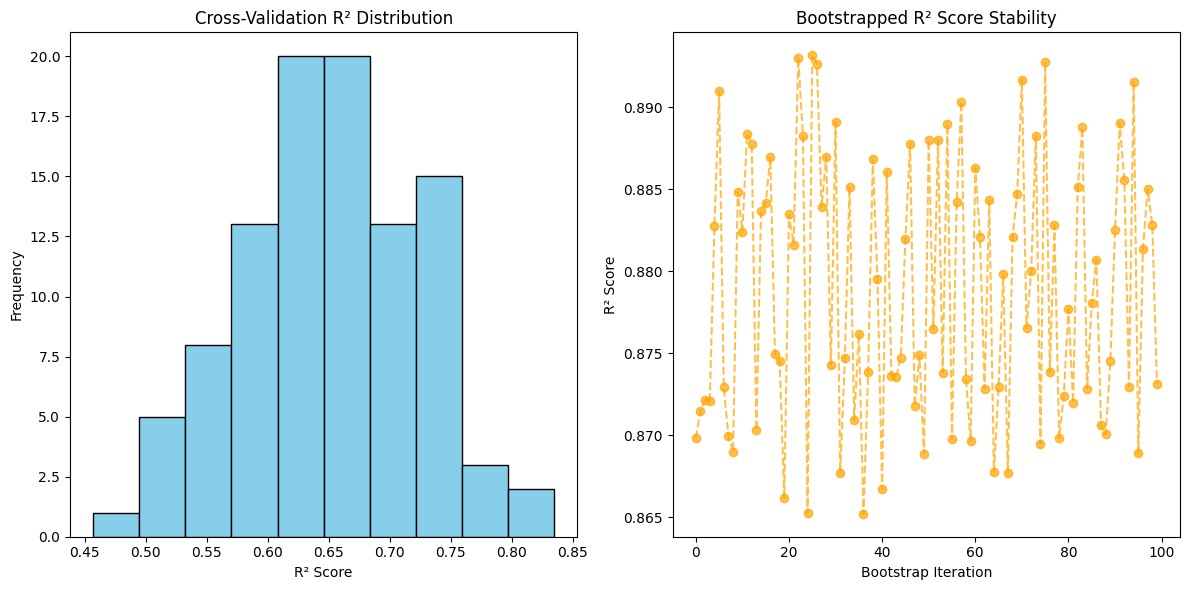

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Cross-Validation R² Distribution')
plt.xlabel('R² Score')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.plot(range(n_bootstrap), bootstrap_scores, marker='o', linestyle='--', color='orange', alpha=0.7)
plt.title('Bootstrapped R² Score Stability')
plt.xlabel('Bootstrap Iteration')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

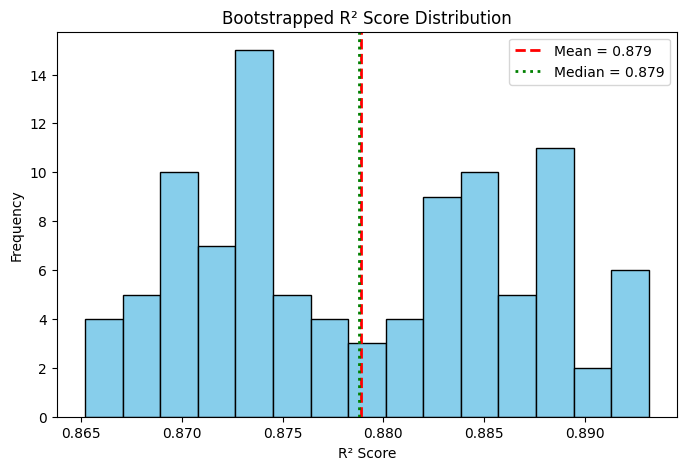

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(bootstrap_scores, bins=15, color='skyblue', edgecolor='black')
plt.title("Bootstrapped R² Score Distribution")
plt.xlabel("R² Score")
plt.ylabel("Frequency")
plt.axvline(np.mean(bootstrap_scores), color='red', linestyle='dashed', linewidth=2, label=f"Mean = {np.mean(bootstrap_scores):.3f}")
plt.axvline(np.median(bootstrap_scores), color='green', linestyle='dotted', linewidth=2, label=f"Median = {np.median(bootstrap_scores):.3f}")
plt.legend()
plt.show()


In [ ]:

mean_score = np.mean(scores)
std_score = np.std(scores, ddof=1)
conf_int = stats.norm.interval(0.95, loc=mean_score, scale=std_score/np.sqrt(len(scores)))
print("95% Confidence Interval for R2 mean score:", conf_int)

95% Confidence Interval for R2 mean score: (np.float64(0.6377512774194792), np.float64(0.6664089868119735))


In [ ]:
# Test 1: baseline stacking model without feature selection

estimators = [
    ('lr',LinearRegression()),
    ('nb', GaussianNB()),
    
    #('random_forest', ensemble.RandomForestRegressor()),
    ('regressor', ensemble.GradientBoostingRegressor()),
    

]

reg = ensemble.StackingRegressor(
    estimators=estimators,
    n_jobs=-1,
    final_estimator=ensemble.RandomForestRegressor()
)

pipeline = Pipeline([
    ('scaler', preprocessing.RobustScaler()),         # PowerTransformer, RobustScaler, Normalizer
    ('stack', reg)
])

pipeline

,steps,"[('scaler', ...), ('stack', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False
,estimators,"[('lr', ...), ('nb', ...), ...]"
,final_estimator,RandomForestRegressor()


In [ ]:
# Test 1: Evaluate the stacking model using 10-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1, scoring='r2')
print("R2 values using 10-fold CV:", scores)
print("Mean R2 value: %.4f" % scores.mean())

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 655, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 589, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\base.py", line 897, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\preprocessing\_data.py", line 1638, in fit
    X = validate_data(
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\utils\validation.py", line 2954, in validate_data
    out = check_array(X, input_name="X", **check_params)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'FDJ15'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 655, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 589, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\base.py", line 897, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\preprocessing\_data.py", line 1638, in fit
    X = validate_data(
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\utils\validation.py", line 2954, in validate_data
    out = check_array(X, input_name="X", **check_params)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\pushk\anaconda3\envs\openailearning\lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'FDX32'


In [1]:
pip install selenium

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ------------------ --------------------- 4.5/9.7 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 25.2 MB/s  0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)

   -- -------------------------------------  1/15 [websocket-client]
  Attempting uninstall: urllib3
   -- -------------------------------------  1/15 [websocket-client]
    Found existing installation: urllib3 2.3.0
   -- -------------------------------------  1/15 [websocket-client]
    Uninstalling urllib3-2.3.0:
   -- -------------------------------------  1/15 [websocket-client]
      Successfully uninstalled urllib3-2.3.0
   -- -------------------------------------  1/15 [websocket-client]
   ----- ----------------------------------  2/15 [urllib3]
  Attempting uninstall: typing_extensions
   ----- -----------------------------

In [ ]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from numpy import arange
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn import ensemble, preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import FunctionTransformer

X = df.drop(['Sales'], axis=1)  
y = df['Sales']



#drop unnecessary columns
drop_cols = ['Item Identifier']
drop_columns_transformer = FunctionTransformer(lambda X: X.drop(columns=drop_cols, errors='ignore'))



# 1️⃣ Numeric pipeline     --For Numeric type columns
num_pipe = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('imputer', KNNImputer(n_neighbors=3,weights='uniform',metric='nan_euclidean' )), #weight :or 'distance' , metric: 'manhattan' or 'minkowski' also possible
    ('imputer', IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=42)),
    ('scaler', StandardScaler()),
])
'''
# 2️⃣ Categorical pipeline (ordinal)  ---For categorical types columns but only for independenet fetrures
cat_pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
'''


cat_pipe_high = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

cat_pipe_low = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


'''
# 3️⃣ Categorical pipeline (one-hot)  ---For categorical types columns
cat_pipe_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))  #drop='first'
    #('encoder' , OneHotEncoder(drop='if_binary', handle_unknown='ignore')) #for binary encoding
])
'''
# 4️⃣ Combine all
transformer = ColumnTransformer(transformers=[
    ('num', num_pipe, ['Item Weight','Rating','Item Visibility']),
    #('cat_ord', cat_pipe_ordinal, ['Genre']),
    #('cat_ohe', cat_pipe_ohe, ["OutletKey", "ItemKey", "ItemContentKey"]),
    #('cat_pipe_label',cat_pipe_label, ['has_covid']),
    ('high_card_cols', cat_pipe_high, ['ItemContentKey', 'ItemKey']),
    ('low_card_cols', cat_pipe_low, ['OutletKey'])
], remainder='passthrough')  #passthrough


#Choose model (bagging + boosting options)

#base_rf = RandomForestRegressor(n_estimators=100, random_state=42)
#bagging_model = BaggingRegressor(estimator=base_rf, n_estimators=20, random_state=42)
#boosting_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42

estimators = [
    ('lr',LinearRegression()),
    ('regressor_knn', KNeighborsRegressor()),
    #('nb', GaussianNB()),
    #('random_forest', ensemble.RandomForestRegressor()),
    ('regressor', ensemble.GradientBoostingRegressor()),
    

]

reg = ensemble.StackingRegressor(
    estimators=estimators,
    n_jobs=-1,
    final_estimator=ensemble.RandomForestRegressor()
)

pipeline = Pipeline([
    ('drop_cols', drop_columns_transformer),   # drop redundant columns
    ('transformer', transformer),
    ('scaler', preprocessing.RobustScaler()),         # PowerTransformer, RobustScaler, Normalizer
    ('stack', reg)
])

pipeline




scores = cross_val_score(pipeline, X, y, cv=10, n_jobs=-1, scoring='r2')  # f1_macro for imbalanced classes, take different values for cv,n_jobs,abd pipleline with differnet models
print("Classification accuracy values using 10-fold CV:", scores)   # any negative or extreme values?
print("Mean classification accuracy: %.4f" % scores.mean())

'''
scores = cross_val_score(pipeline, X, y, cv=KFold(n_splits=100, shuffle=True), scoring='r2')
print("Pipeline Linear Regression CV R2 scores:", scores)
print("Bootstrapping median R2 score: %.4f" % np.median(scores))
print("Bootstrapping mean R2 score: %.4f" % scores.mean())
'''
'''
n_bootstrap = 100
bootstrap_scores = []

for i in tqdm(range(n_bootstrap), desc="Bootstrapping..."):
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.8, random_state=42+i)
    pipeline.fit(X_sample, y_sample)
    bootstrap_scores.append(pipeline.score(X, y))

bootstrap_scores = np.array(bootstrap_scores)

print("\nBootstrapping Results:")
print("Mean Bootstrapped R²:", bootstrap_scores.mean())
print("Median Bootstrapped R²:", np.median(bootstrap_scores))
print("Std Bootstrapped R²:", bootstrap_scores.std())

)'''

Classification accuracy values using 10-fold CV: [ 0.06968055 -0.0195399   0.0624111   0.03147756  0.0391228   0.01383837
  0.0362556   0.05424093  0.04010074  0.07015916]
Mean classification accuracy: 0.0398


'\nn_bootstrap = 100\nbootstrap_scores = []\n\nfor i in tqdm(range(n_bootstrap), desc="Bootstrapping..."):\n    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.8, random_state=42+i)\n    pipeline.fit(X_sample, y_sample)\n    bootstrap_scores.append(pipeline.score(X, y))\n\nbootstrap_scores = np.array(bootstrap_scores)\n\nprint("\nBootstrapping Results:")\nprint("Mean Bootstrapped R²:", bootstrap_scores.mean())\nprint("Median Bootstrapped R²:", np.median(bootstrap_scores))\nprint("Std Bootstrapped R²:", bootstrap_scores.std())\n\n)'

In [ ]:
from sklearn.inspection import permutation_importance
pipeline.fit(X, y)
result= permutation_importance(
    pipeline, X, y, n_repeats=10, n_jobs=-1
)

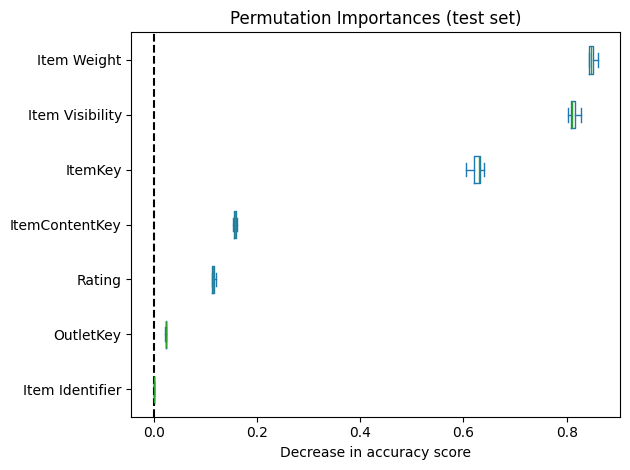

In [ ]:
import pandas as pd
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
import pandas as pd
results_df = pd.DataFrame(grid.cv_results_)
print("\nAll results:")
print(results_df[['param_select__k', 'mean_test_score', 'std_test_score']].sort_values('mean_test_score', ascending=False))


All results:
   param_select__k  mean_test_score  std_test_score
2                5         0.679197        0.029673
3                6         0.676210        0.027804
1                4         0.674427        0.038066
0                3         0.510988        0.181075


In [ ]:
# permuataion importance , graph , multivarate and univariate, ensemble, stacking , wrapper, bootstrapping, bagging and boosting , sanity check

In [ ]:
#multivariate graph plot

'''   
| Issue                  | Reason                     | Solution                          |
| ---------------------- | -------------------------- | --------------------------------- |
| Densely packed bars    | Too many unique categories | Plot only top N                   |
| Overlapping labels     | Long category names        | Rotate x-labels, increase figsize |
| Meaningless ID column  | Not a real feature         | Drop or encode later              |
| Skewed numeric columns | Large value range          | Use log-scale or binning          |

'''

'   \n| Issue                  | Reason                     | Solution                          |\n| ---------------------- | -------------------------- | --------------------------------- |\n| Densely packed bars    | Too many unique categories | Plot only top N                   |\n| Overlapping labels     | Long category names        | Rotate x-labels, increase figsize |\n| Meaningless ID column  | Not a real feature         | Drop or encode later              |\n| Skewed numeric columns | Large value range          | Use log-scale or binning          |\n\n'

C:\Users\pushk\AppData\Local\Temp\ipykernel_24304\2900358725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='coolwarm')


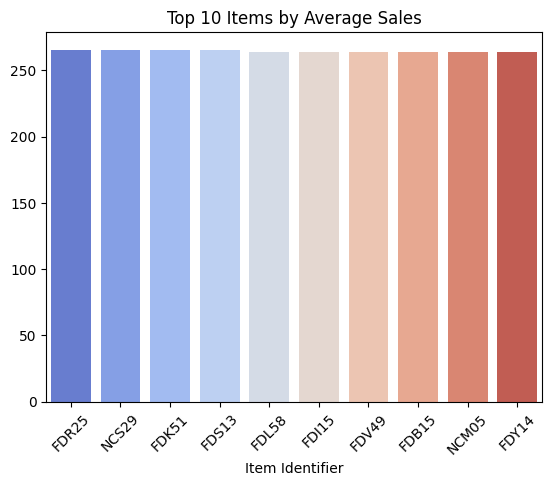

In [ ]:
#Aggregate by Another Feature
#Example — check average sales per item:
avg_sales = df.groupby('Item Identifier')['Sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='coolwarm')
plt.title('Top 10 Items by Average Sales')
plt.xticks(rotation=45)
plt.show()


C:\Users\pushk\AppData\Local\Temp\ipykernel_24304\1937968246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='Set2')


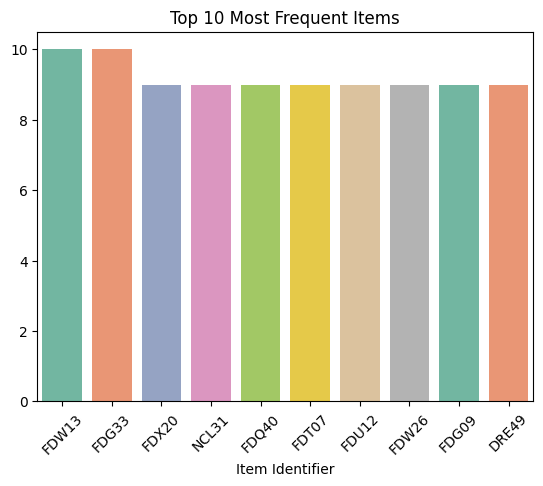

In [ ]:
#. Plot only Top N Categories
top_items = df['Item Identifier'].value_counts().nlargest(10)
sns.barplot(x=top_items.index, y=top_items.values, palette='Set2')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45)
plt.show()


C:\Users\pushk\AppData\Local\Temp\ipykernel_24304\2221715095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OutletKey', data=df, palette='Set2')


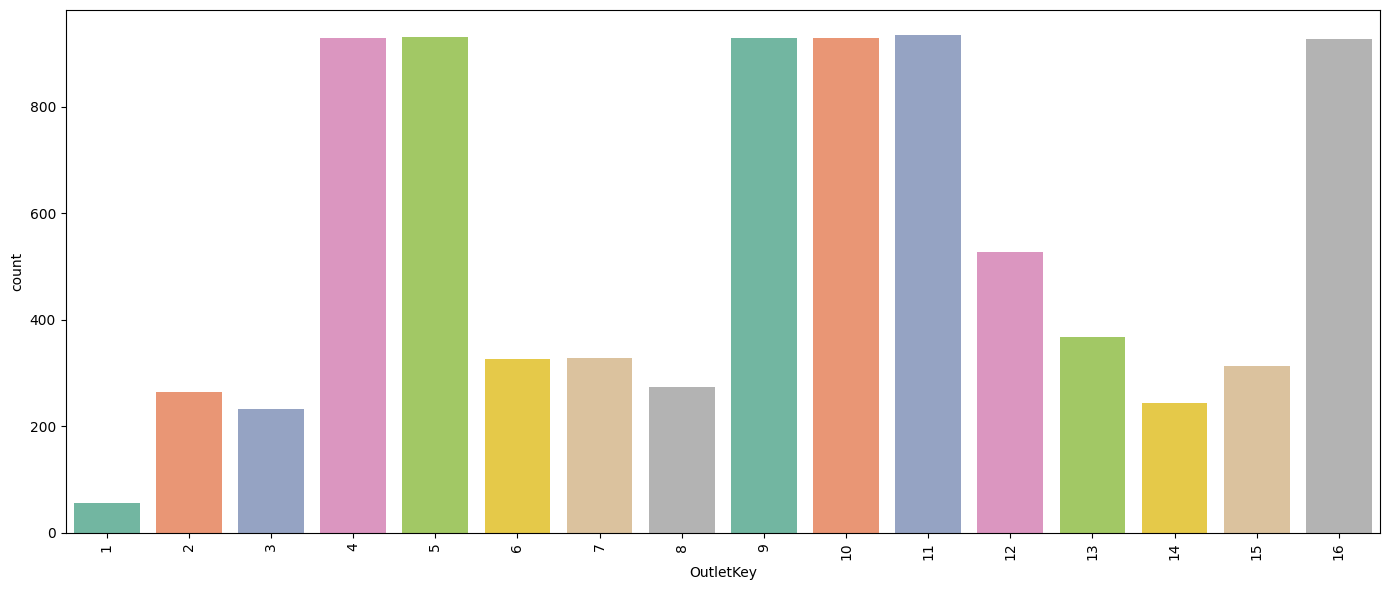

In [ ]:
#5. For Dense Axes (General Trick)
#If your graph looks dense even for medium categories (like Outlet or Genre):
plt.figure(figsize=(14,6))   # make bigger plot
sns.countplot(x='OutletKey', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\pushk\AppData\Local\Temp\ipykernel_24304\2328811213.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='viridis')


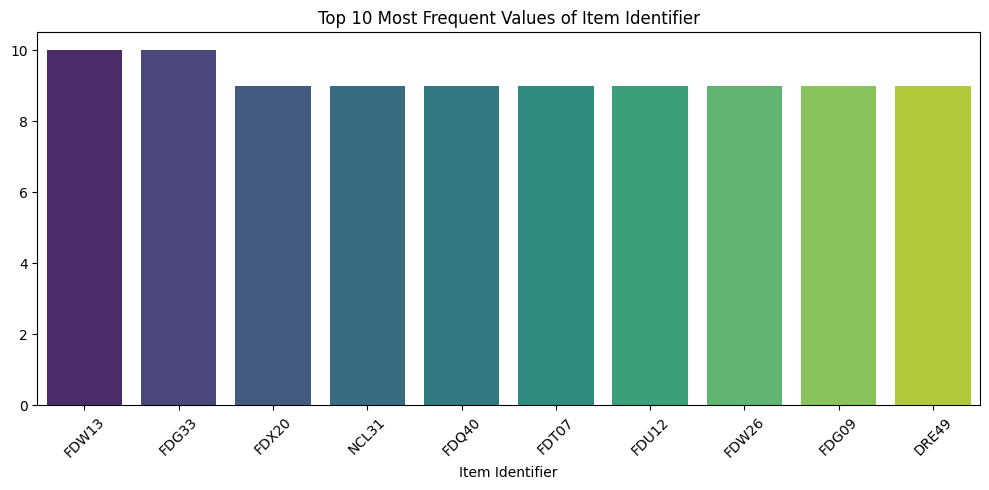

In [ ]:
#reusable plotting function to automatically handle dense plots:
import seaborn as sns
import matplotlib.pyplot as plt

def smart_countplot(df, col, top_n=10):
    unique_count = df[col].nunique()
    plt.figure(figsize=(10,5))

    if unique_count > top_n:
        top_vals = df[col].value_counts().nlargest(top_n)
        sns.barplot(x=top_vals.index, y=top_vals.values, palette='viridis')
        plt.title(f'Top {top_n} Most Frequent Values of {col}')
    else:
        sns.countplot(x=col, data=df, palette='viridis')
        plt.title(f'Countplot of {col}')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




smart_countplot(df, 'Item Identifier')
